In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here. A convenience interface for specifying models 
import scipy

import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
data = pd.read_csv('../data/processed/Final_data.csv',index_col=False, parse_dates=['registration_init_time'])

In [4]:
data.head()

Unnamed: 0                                          msno  is_churn  city  \
0           0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1   5.0   
1           1  f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=         1  13.0   
2           2  zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=         1  13.0   
3           4  K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1  13.0   
4           5  ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=         1  22.0   

     bd  registered_via registration_init_time  registered_year  \
0  28.0             3.0             2013-12-23           2013.0   
1  20.0             3.0             2013-12-23           2013.0   
2  18.0             3.0             2013-12-27           2013.0   
3  35.0             7.0             2014-01-25           2014.0   
4  27.0             3.0             2014-01-26           2014.0   

   change_in_payment_method  total_transaction  ...  \
0                         2                  6  ...   
1                         3                  6  ...   
2                         3                 20  ...   
3                         1                 32  ...   
4                         1                 21  ...   

   diff_last2month_mean_num25  diff_last2month_sum_num50  \
0                  -26.090909                       12.0   
1                   -1.777778                       -1.0   
2                    2.850000                        4.0   
3                   -5.566667                      -22.0   
4                   -3.346154                      -23.0   

   diff_last2month_sum_num75  diff_last2month_mean_num75  \
0                        9.0                   -2.818182   
1                        0.0                    0.111111   
2                        6.0                    0.300000   
3                        2.0                    0.100000   
4                      -17.0                   -1.134615   

   diff_last2month_sum_num985  diff_last2month_mean_num985  \
0                         9.0                    -0.090909   
1                        -3.0                    -0.333333   
2                         4.0                     0.200000   
3                        -2.0                    -0.233333   
4                        -9.0                     0.000000   

   diff_last2month_sum_num100  diff_last2month_mean_num100  \
0                       274.0                   -15.090909   
1                       -43.0                    -3.333333   
2                       -34.0                    -1.700000   
3                       794.0                    50.133333   
4                      -221.0                   -10.596154   

   diff_last2month_sum_num_unq  diff_last2month_mean_num_unq  
0                        302.0                    -14.363636  
1                        -38.0                     -2.555556  
2                         25.0                      1.250000  
3                        335.0                     18.783333  
4                       -292.0                    -14.153846  

[5 rows x 89 columns]

In [5]:
del data['Unnamed: 0']

In [6]:
data.drop(['last_month_login_min','last_month_login_max','last_second_month_login_min','last_second_month_login_max','last_third_month_login_min','last_third_month_login_max'], axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800531 entries, 0 to 800530
Data columns (total 82 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   msno                            800531 non-null  object        
 1   is_churn                        800531 non-null  int64         
 2   city                            800531 non-null  float64       
 3   bd                              800531 non-null  float64       
 4   registered_via                  800531 non-null  float64       
 5   registration_init_time          800531 non-null  datetime64[ns]
 6   registered_year                 800531 non-null  float64       
 7   change_in_payment_method        800531 non-null  int64         
 8   total_transaction               800531 non-null  int64         
 9   max_payment_method              800531 non-null  int64         
 10  avg_plan_days                   800531 non-null  float64

In [8]:
data.rename(columns = {'last_month_total_secs_sum':'last_third_month_total_secs_sum','last_month_total_secs_mean':'last_third_month_total_secs_mean'}, inplace = True)
data.rename(columns = {'last_month_total_secs_sum_y':'last_second_month_total_secs_sum','last_month_total_secs_mean_y':'last_second_month_total_secs_mean'}, inplace = True)
data.rename(columns = {'last_month_total_secs_sum_x':'last_month_total_secs_sum','last_month_total_secs_mean_x':'last_month_total_secs_mean'}, inplace = True)
data.rename(columns = {'last_month_sum_num_100':'last_month_sum_num100'}, inplace = True)

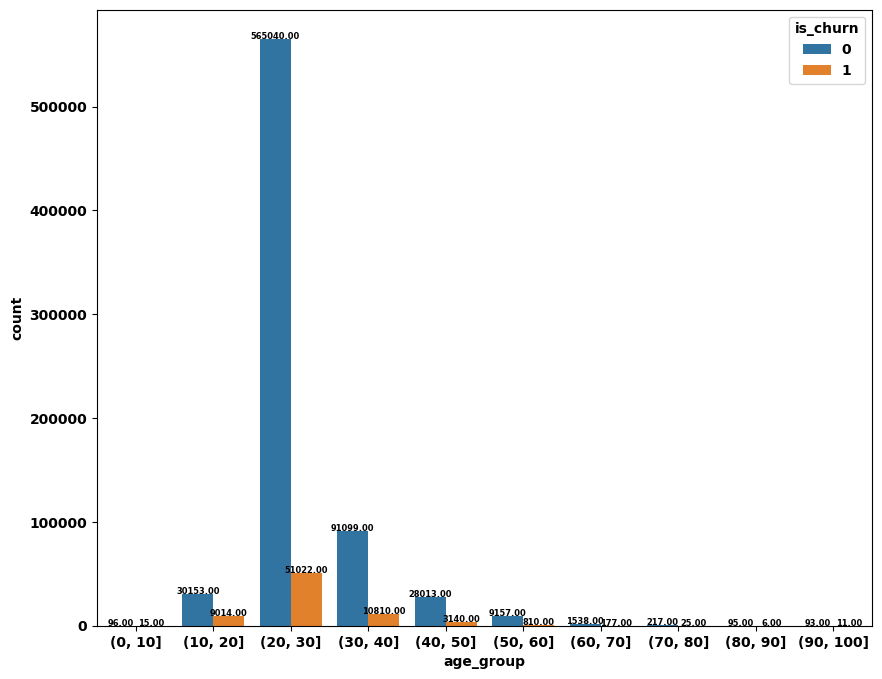

In [9]:
data['age_group'] = pd.cut(data.bd, bins=[0,10,20,30,40,50,60,70,80,90,100],right=True)
plt.figure(figsize=(10, 8))
plots = sns.countplot(x='age_group', data=data, hue='is_churn')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=6, xytext=(0, 2),
                   textcoords='offset points')
plt.show()

array([[<Axes: title={'center': 'is_churn'}>]], dtype=object)

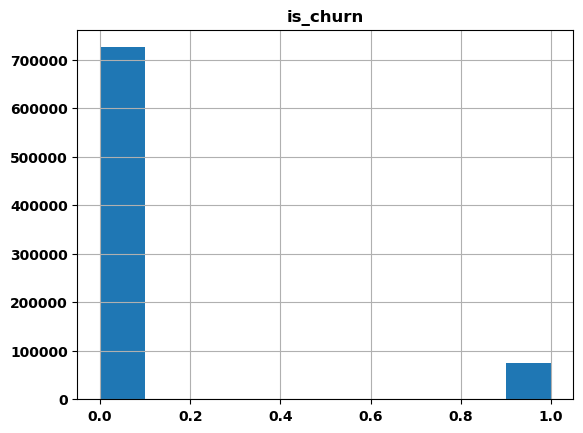

In [10]:
data.hist(column='is_churn')

In [11]:
data['is_churn'].value_counts()

0    725501
1     75030
Name: is_churn, dtype: int64

categorical variable - is_churn,city, age_group,registered_via,registered_year,'last_cancel_status', 'last_auto_renew' 'autorenew_not_cancel_flag', 'not_autorenew_cancel_flag'

In [ ]:
#Df_Lastmonth = data[['is_churn', 'city', 'age_group', 'registered_via',
        'registered_year', 'change_in_payment_method',
       'total_transaction', 'max_payment_method', 'avg_plan_days',
       'sum_plan_days', 'change_in_plan_days', 'avg_list_price',
       'sum_list_price', 'change_in_list_price', 'avg_amt_paid',
       'sum_amt_paid', 'change_in_amt_paid', 'avg_discount', 'sum_discount',
       'last_cancel_status', 'last_auto_renew', 'avg_days_diff_trans_exp',
       'autorenew_not_cancel_flag', 'not_autorenew_cancel_flag',
       'last_month_login_count', 'last_month_sum_num25',
       'last_month_mean_num25', 'last_month_sum_num50',
       'last_month_mean_num50', 'last_month_sum_num75',
       'last_month_mean_num75', 'last_month_sum_num985',
       'last_month_mean_num985', 'last_month_sum_num_100',
       'last_month_mean_num100', 'last_month_sum_num_unq',
       'last_month_mean_num_unq', 'last_month_total_secs_sum',
       'last_month_total_secs_mean']]

In [ ]:
Df_Lastmonth.head()

In [12]:
data.columns

Index(['msno', 'is_churn', 'city', 'bd', 'registered_via',
       'registration_init_time', 'registered_year', 'change_in_payment_method',
       'total_transaction', 'max_payment_method', 'avg_plan_days',
       'sum_plan_days', 'change_in_plan_days', 'avg_list_price',
       'sum_list_price', 'change_in_list_price', 'avg_amt_paid',
       'sum_amt_paid', 'change_in_amt_paid', 'avg_discount', 'sum_discount',
       'last_cancel_status', 'last_auto_renew', 'avg_days_diff_trans_exp',
       'autorenew_not_cancel_flag', 'not_autorenew_cancel_flag',
       'last_month_login_count', 'last_month_sum_num25',
       'last_month_mean_num25', 'last_month_sum_num50',
       'last_month_mean_num50', 'last_month_sum_num75',
       'last_month_mean_num75', 'last_month_sum_num985',
       'last_month_mean_num985', 'last_month_sum_num100',
       'last_month_mean_num100', 'last_month_sum_num_unq',
       'last_month_mean_num_unq', 'last_month_total_secs_sum',
       'last_month_total_secs_mean', 'las

<Axes: xlabel='is_churn', ylabel='last_month_sum_num25'>

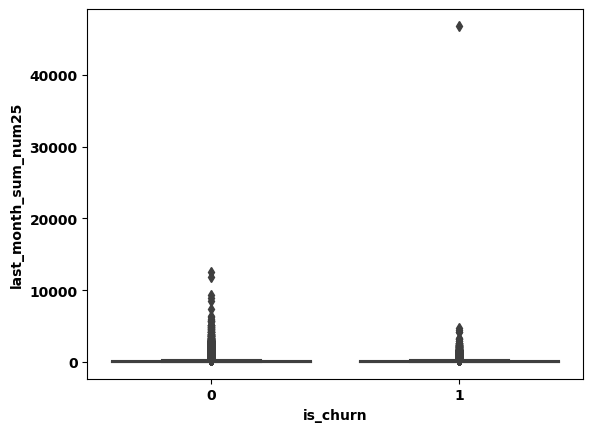

In [13]:

sns.boxplot(x = 'is_churn', y = 'last_month_sum_num25',data=data)

In [14]:
# remove outlier above 40000
data = data[data['last_month_sum_num25'] < 40000]

<Axes: xlabel='is_churn', ylabel='last_month_sum_num25'>

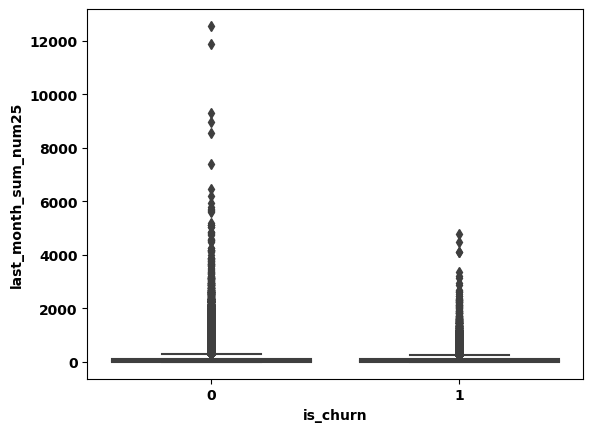

In [15]:

sns.boxplot(x = 'is_churn', y = 'last_month_sum_num25',data=data)

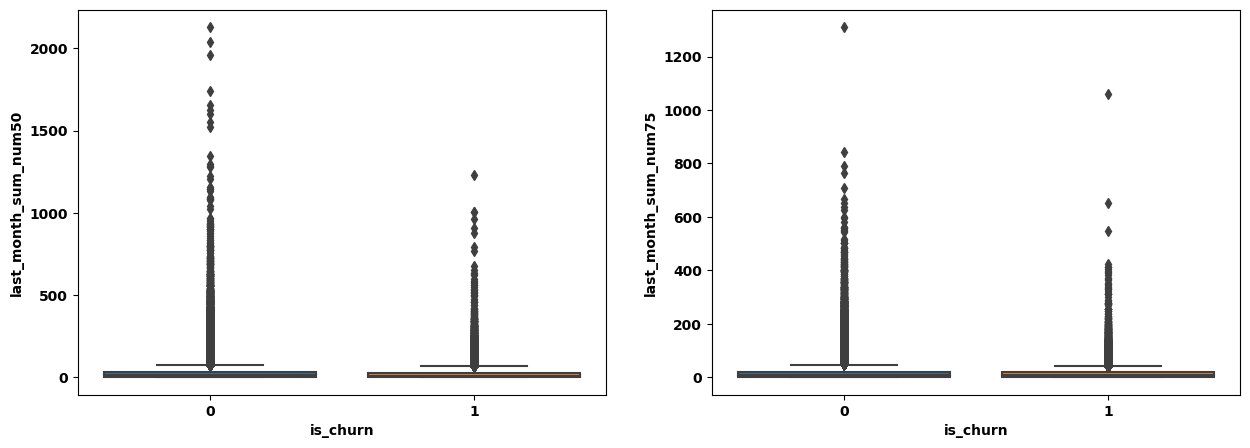

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num50',data=data,ax=ax1)
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num75',data=data,ax=ax2)
plt.show()

In [17]:
# remove outlier above 400  for last_month_mean_num50, above 140 for last_month_mean_num75
data = data[data['last_month_sum_num50'] < 1800]
data = data[data['last_month_sum_num75'] < 1200]

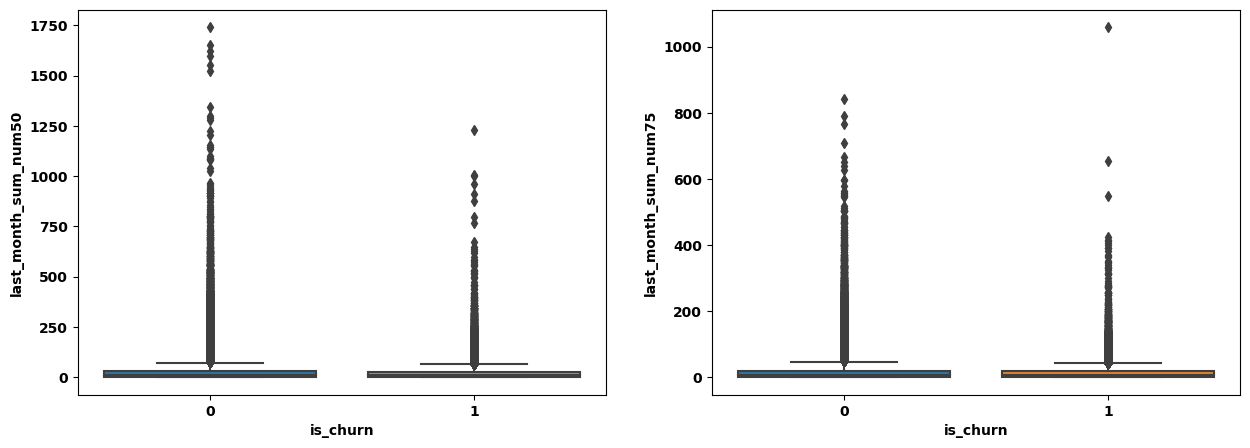

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num50',data=data,ax=ax1)
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num75',data=data,ax=ax2)
plt.show()

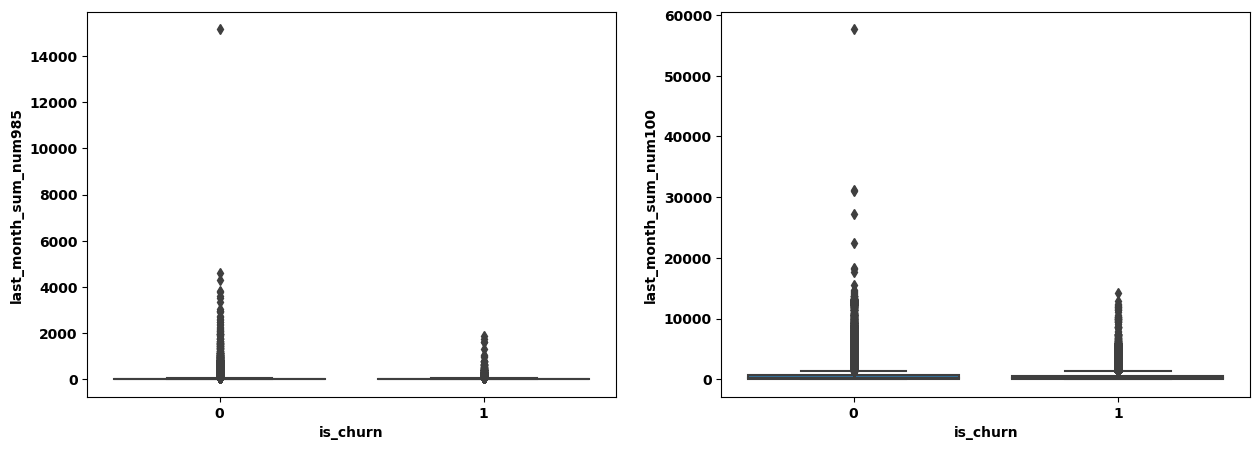

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num985',data=data,ax=ax1)
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num100',data=data,ax=ax2)
plt.show()

In [20]:
# remove outlier above 300  for last_month_mean_num985, above 1500 for last_month_mean_num100
data = data[data['last_month_sum_num985'] < 14000]
data = data[data['last_month_sum_num75'] < 50000]

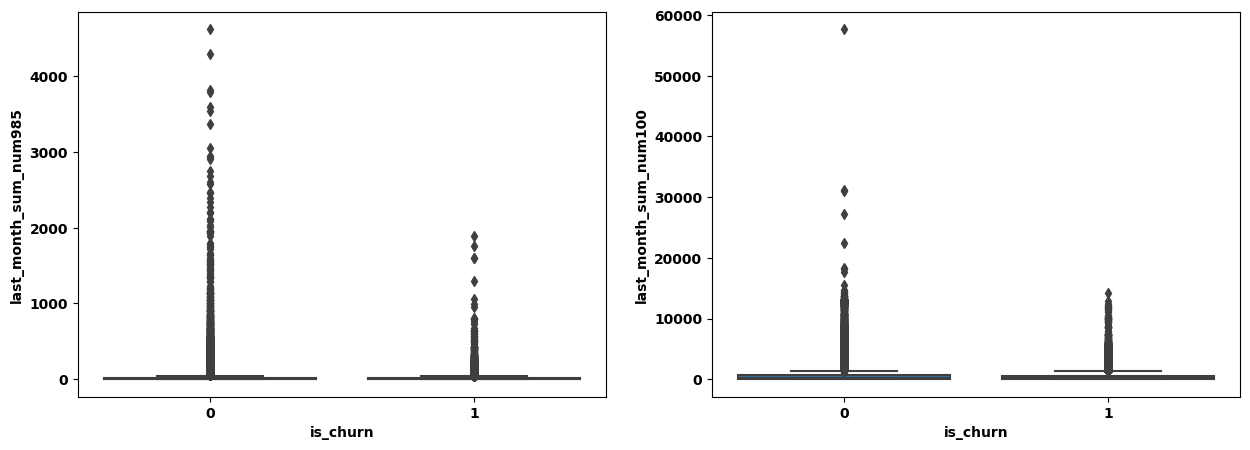

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num985',data=data,ax=ax1)
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num100',data=data,ax=ax2)
plt.show()

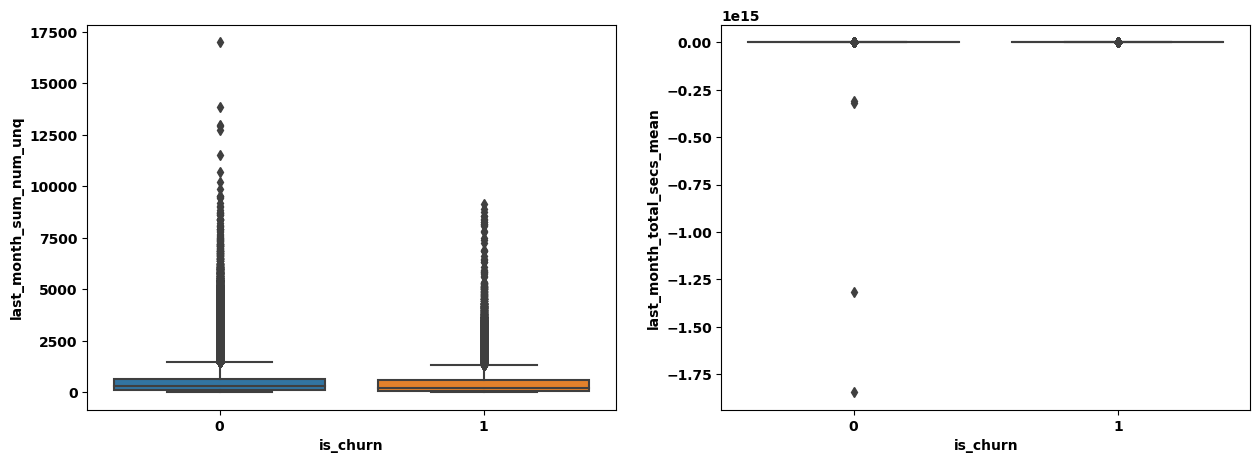

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num_unq',data=data,ax=ax1)
sns.boxplot(x = 'is_churn', y = 'last_month_total_secs_mean',data=data,ax=ax2)
plt.show()

In [ ]:
# remove outlier above 300  for last_month_mean_num985, above 1500 for last_month_mean_num100
data = data[data['last_month_sum_num985'] < 14000]
data = data[data['last_month_sum_num75'] < 50000]

In [30]:
print(data['last_month_total_secs_sum'].min(),data['last_month_total_secs_sum'].max())

-9223372000000000.0 14337392.0


In [38]:
#Remove -ve value in total secs played column
data = data[data['last_month_total_secs_sum'] > 0]

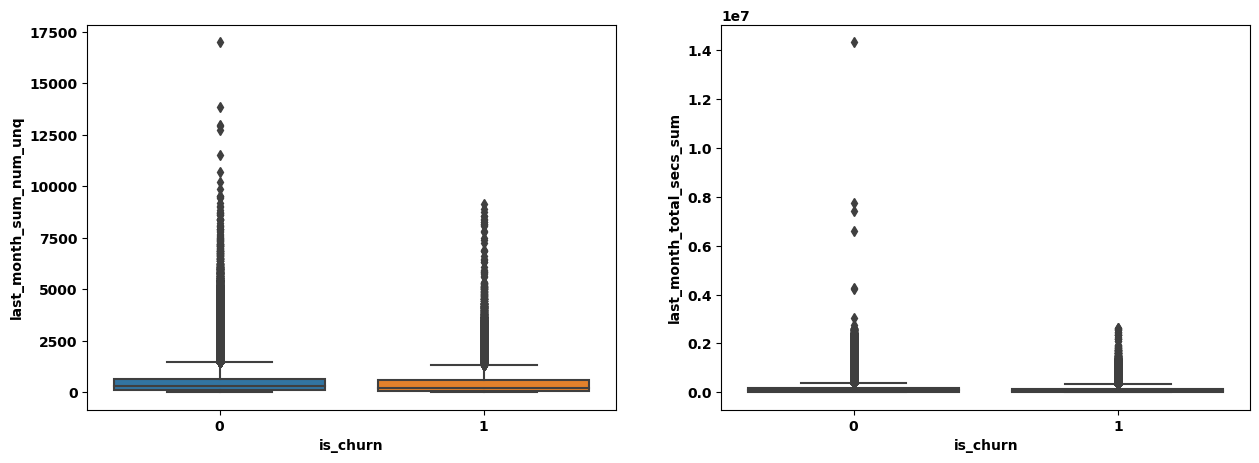

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num_unq',data=data,ax=ax1)
sns.boxplot(x = 'is_churn', y = 'last_month_total_secs_sum',data=data,ax=ax2)
plt.show()

In [44]:
data[data['last_month_total_secs_sum'] > 10000000]

msno  is_churn  city    bd  \
264161  yK9jxHXWeuQDggeMLiwrJRoLygKWURnrv3fq1wcthT0=         0  13.0  27.0   

        registered_via registration_init_time  registered_year  \
264161             9.0             2014-09-21           2014.0   

        change_in_payment_method  total_transaction  max_payment_method  ...  \
264161                         1                 14                  36  ...   

        diff_last2month_sum_num50  diff_last2month_sum_num75  \
264161                      125.0                      138.0   

        diff_last2month_mean_num75  diff_last2month_sum_num985  \
264161                    3.533333                       119.0   

        diff_last2month_mean_num985  diff_last2month_sum_num100  \
264161                     2.433333                     14761.0   

        diff_last2month_mean_num100  diff_last2month_sum_num_unq  \
264161                   271.961538                       3258.0   

        diff_last2month_mean_num_unq  age_group  
264161                     66.205128   (20, 30]  

[1 rows x 83 columns]

In [47]:
# remove outlier above 15000  for last_month_sum_num_unq, above 6000000 for last_month_total_secs_sum
data = data[data['last_month_sum_num_unq'] < 15000]
data = data[data['last_month_total_secs_sum'] < 6000000]

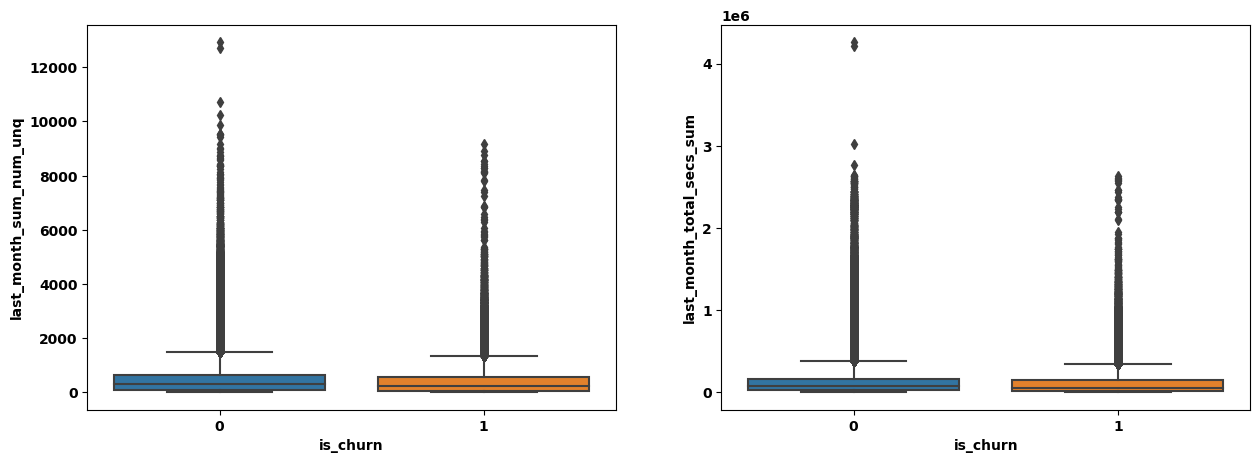

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'is_churn', y = 'last_month_sum_num_unq',data=data,ax=ax1)
sns.boxplot(x = 'is_churn', y = 'last_month_total_secs_sum',data=data,ax=ax2)
plt.show()

<Axes: xlabel='is_churn', ylabel='last_month_total_secs_sum'>

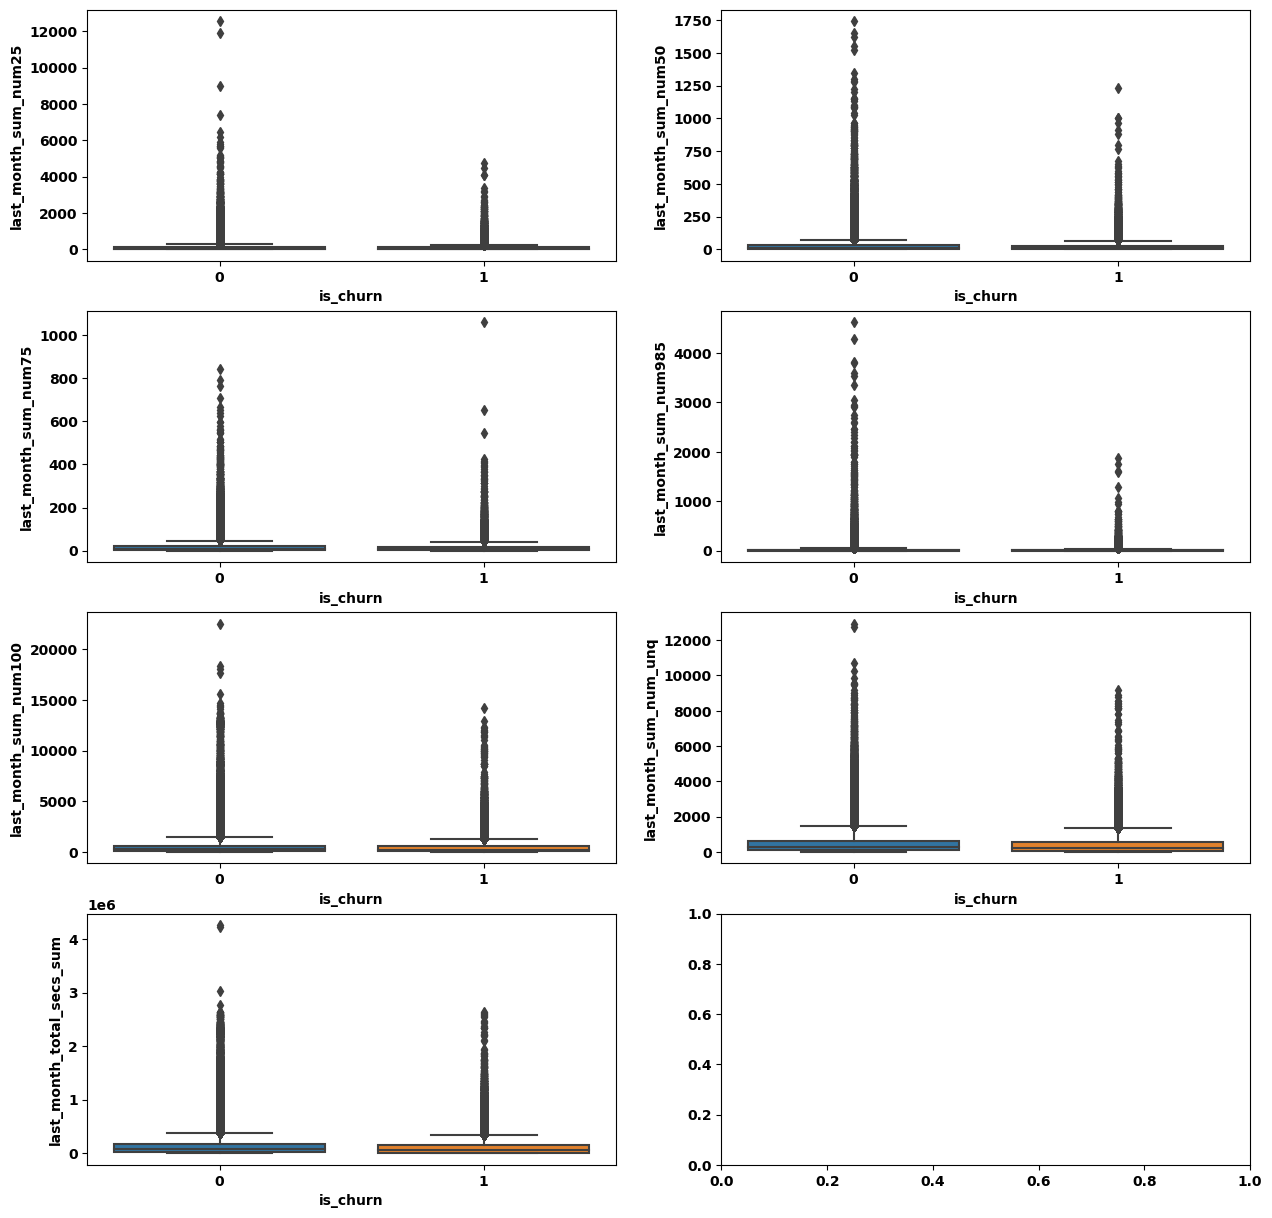

In [68]:
fig, axes = plt.subplots(4, 2, figsize=(15,15))

#create boxplot in each subplot
sns.boxplot(data=data, x='is_churn', y='last_month_sum_num25', ax=axes[0,0])
sns.boxplot(data=data, x='is_churn', y='last_month_sum_num50', ax=axes[0,1])
sns.boxplot(data=data, x='is_churn', y='last_month_sum_num75', ax=axes[1,0])
sns.boxplot(data=data, x='is_churn', y='last_month_sum_num985', ax=axes[1,1])
sns.boxplot(data=data, x='is_churn', y='last_month_sum_num100', ax=axes[2,0])
sns.boxplot(data=data, x='is_churn', y='last_month_sum_num_unq', ax=axes[2,1])
sns.boxplot(data=data, x='is_churn', y='last_month_total_secs_sum', ax=axes[3,0])

<Axes: xlabel='is_churn', ylabel='last_second_month_total_secs_sum'>

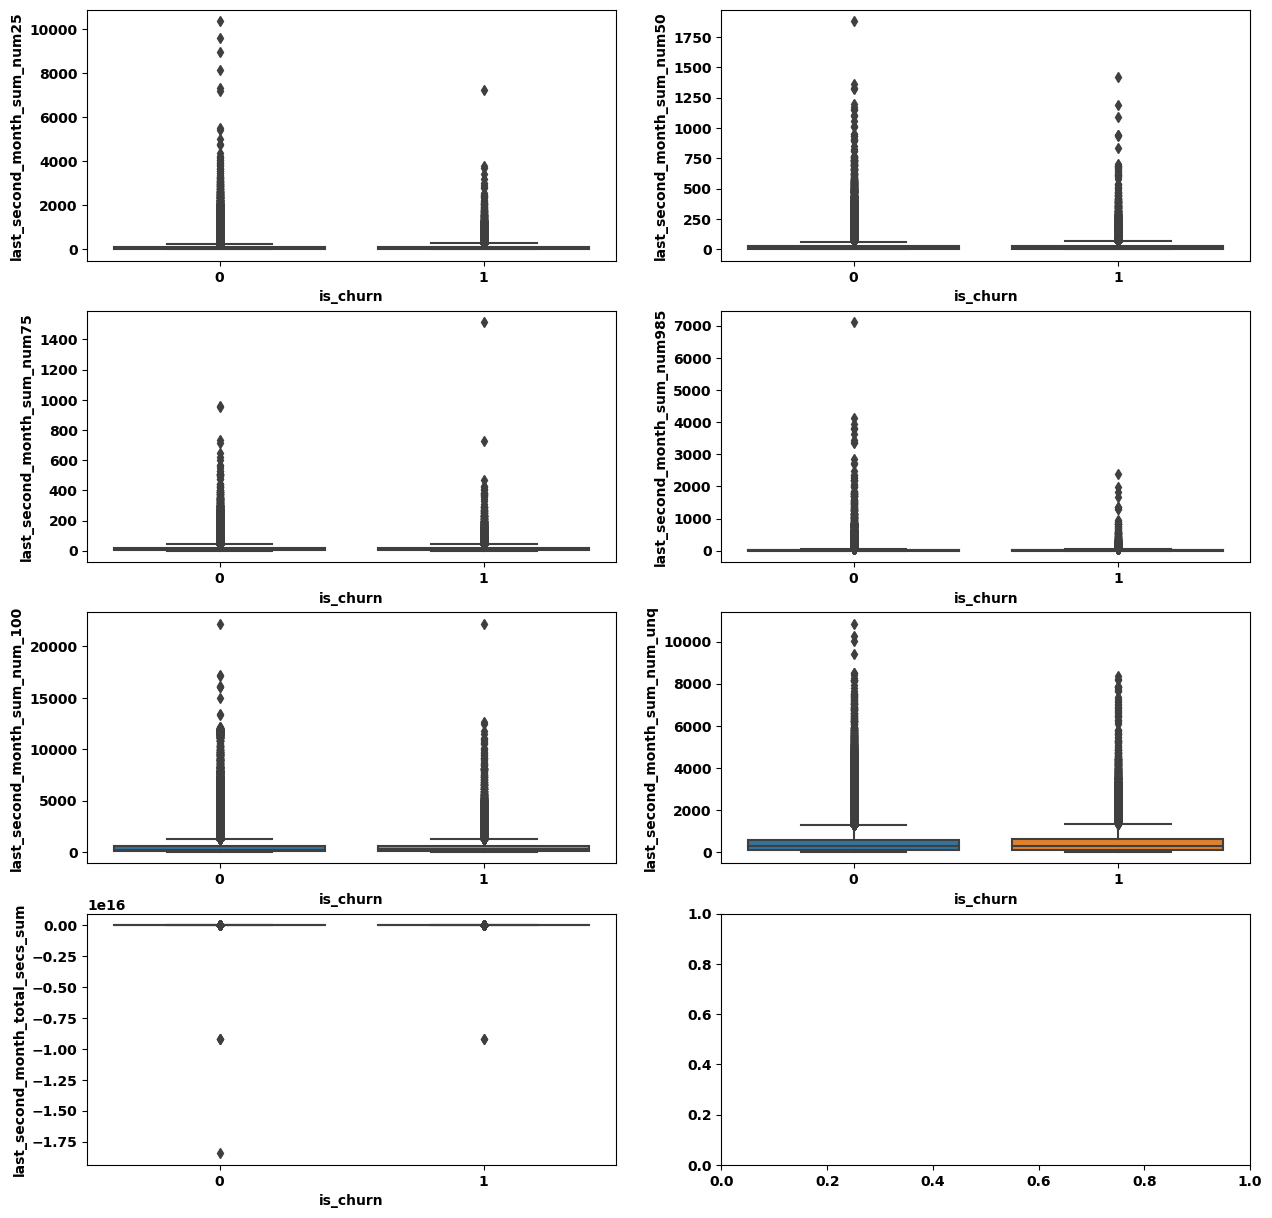

In [65]:
fig, axes = plt.subplots(4, 2, figsize=(15,15))

#create boxplot in each subplot
sns.boxplot(data=data, x='is_churn', y='last_second_month_sum_num25', ax=axes[0,0])
sns.boxplot(data=data, x='is_churn', y='last_second_month_sum_num50', ax=axes[0,1])
sns.boxplot(data=data, x='is_churn', y='last_second_month_sum_num75', ax=axes[1,0])
sns.boxplot(data=data, x='is_churn', y='last_second_month_sum_num985', ax=axes[1,1])
sns.boxplot(data=data, x='is_churn', y='last_second_month_sum_num_100', ax=axes[2,0])
sns.boxplot(data=data, x='is_churn', y='last_second_month_sum_num_unq', ax=axes[2,1])
sns.boxplot(data=data, x='is_churn', y='last_second_month_total_secs_sum', ax=axes[3,0])

In [69]:
# remove -ve outlier last_second_month_total_secs_sum
data = data[data['last_second_month_total_secs_sum'] > 0]

<Axes: xlabel='is_churn', ylabel='last_third_month_total_secs_sum'>

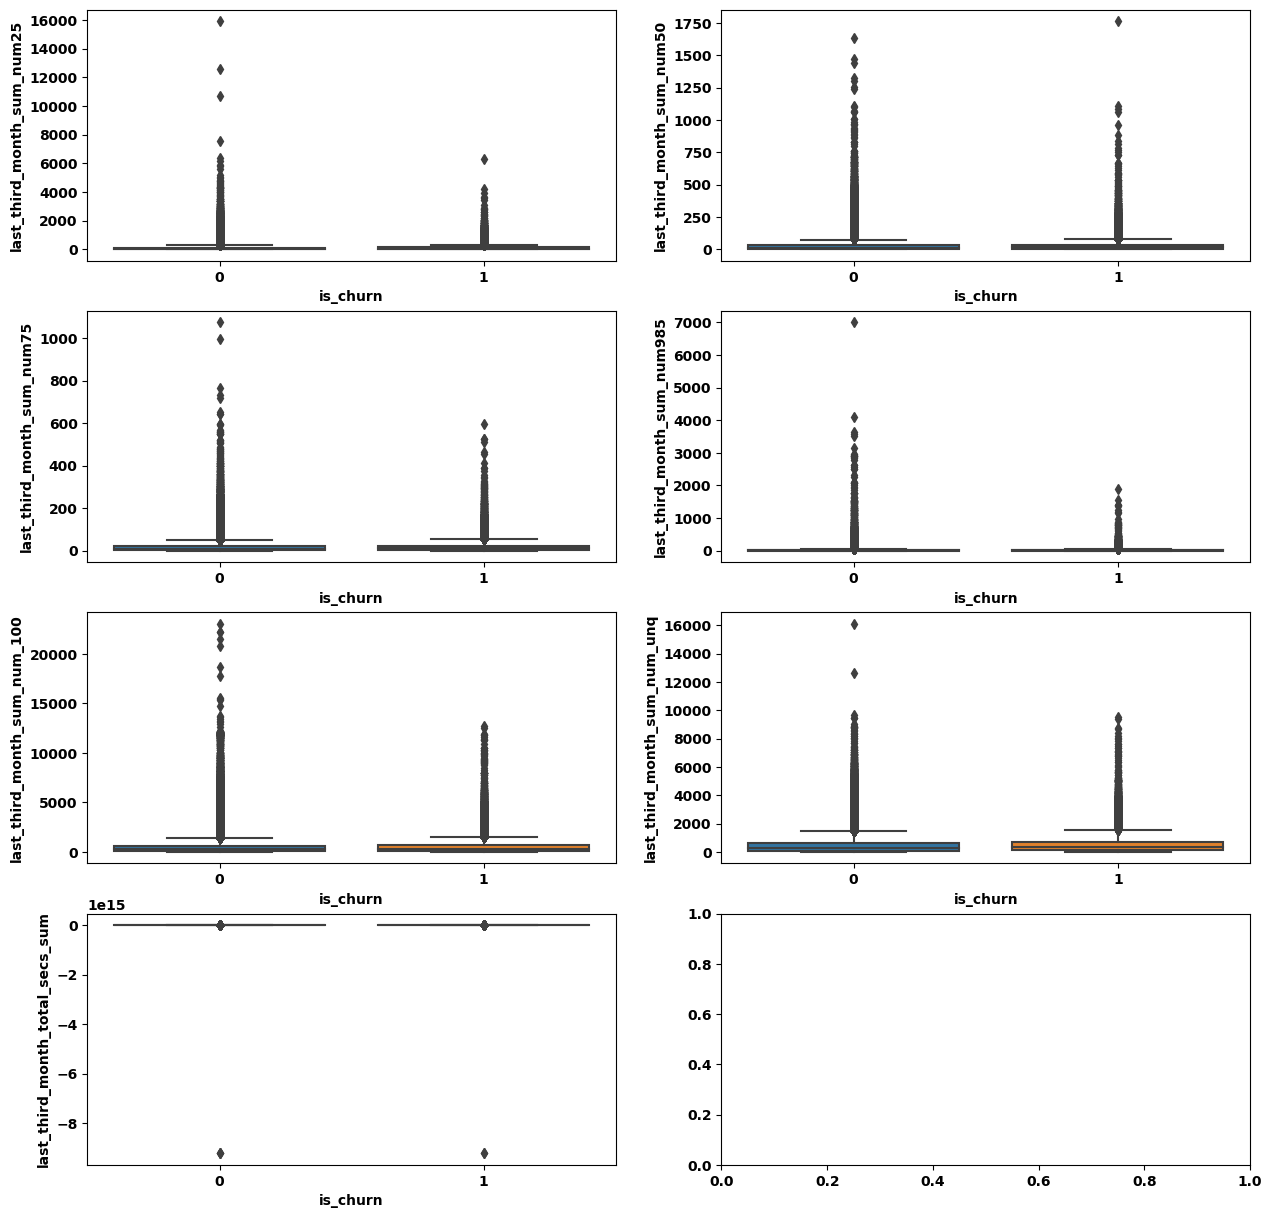

In [66]:
fig, axes = plt.subplots(4, 2, figsize=(15,15))

#create boxplot in each subplot
sns.boxplot(data=data, x='is_churn', y='last_third_month_sum_num25', ax=axes[0,0])
sns.boxplot(data=data, x='is_churn', y='last_third_month_sum_num50', ax=axes[0,1])
sns.boxplot(data=data, x='is_churn', y='last_third_month_sum_num75', ax=axes[1,0])
sns.boxplot(data=data, x='is_churn', y='last_third_month_sum_num985', ax=axes[1,1])
sns.boxplot(data=data, x='is_churn', y='last_third_month_sum_num_100', ax=axes[2,0])
sns.boxplot(data=data, x='is_churn', y='last_third_month_sum_num_unq', ax=axes[2,1])
sns.boxplot(data=data, x='is_churn', y='last_third_month_total_secs_sum', ax=axes[3,0])

In [70]:
# remove -ve outlier last_third_month_total_secs_sum
data = data[data['last_third_month_total_secs_sum'] > 0]

In [73]:
data['diff_last2month_total_secs_sum'] = data['last_month_total_secs_sum']-data['last_second_month_total_secs_sum']

<Axes: xlabel='is_churn', ylabel='diff_last2month_total_secs_sum'>

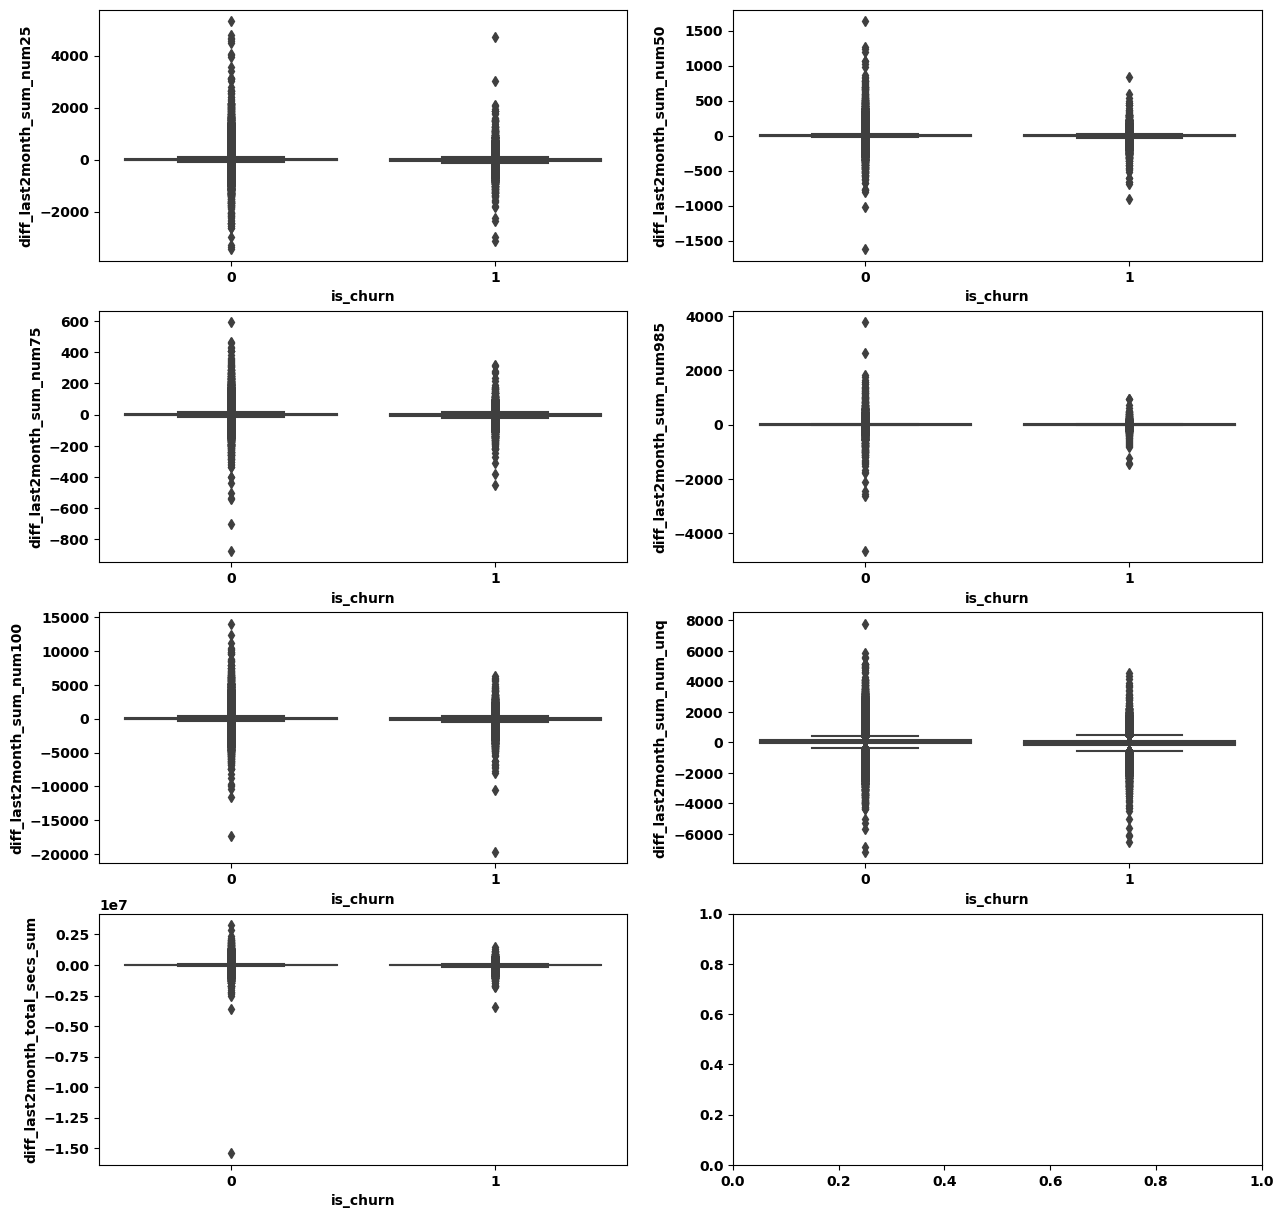

In [74]:
fig, axes = plt.subplots(4, 2, figsize=(15,15))

#create boxplot in each subplot
sns.boxplot(data=data, x='is_churn', y='diff_last2month_sum_num25', ax=axes[0,0])
sns.boxplot(data=data, x='is_churn', y='diff_last2month_sum_num50', ax=axes[0,1])
sns.boxplot(data=data, x='is_churn', y='diff_last2month_sum_num75', ax=axes[1,0])
sns.boxplot(data=data, x='is_churn', y='diff_last2month_sum_num985', ax=axes[1,1])
sns.boxplot(data=data, x='is_churn', y='diff_last2month_sum_num100', ax=axes[2,0])
sns.boxplot(data=data, x='is_churn', y='diff_last2month_sum_num_unq', ax=axes[2,1])
sns.boxplot(data=data, x='is_churn', y='diff_last2month_total_secs_sum', ax=axes[3,0])

In [23]:
#correct the data
data['autorenew_not_cancel_flag'] = ((data['last_auto_renew']==1) & (data['last_cancel_status']==0)).astype(np.int8)
data['autorenew_cancel_flag'] = ((data['last_auto_renew']==1) & (data['last_cancel_status']==1)).astype(np.int8)
del data['not_autorenew_cancel_flag']

In [76]:
data.to_csv('../data/processed/Data_EDA.csv', index=False)

<Axes: xlabel='change_in_payment_method', ylabel='count'>

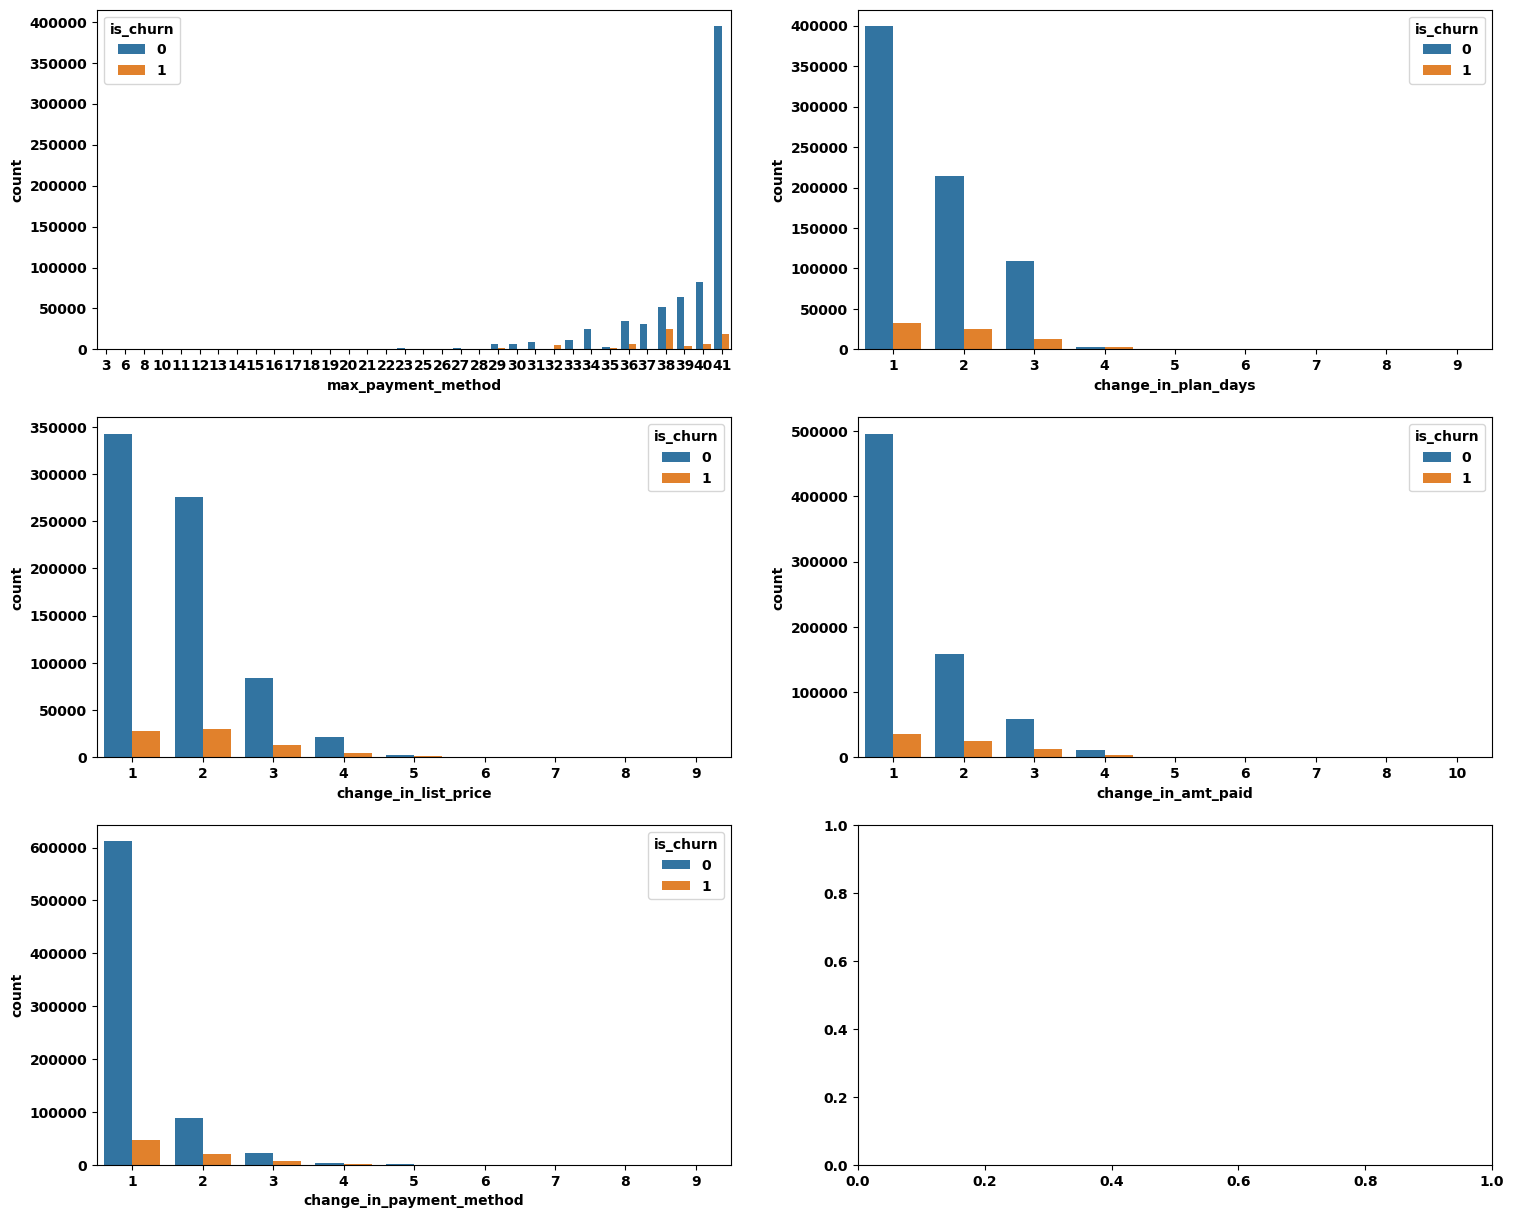

In [97]:
fig, axes = plt.subplots(3, 2, figsize=(18,15))

#create countplot in each subplot
sns.countplot(x='max_payment_method', data=data, hue='is_churn', ax=axes[0,0])
sns.countplot(x='change_in_plan_days', data=data, hue='is_churn', ax=axes[0,1])
sns.countplot(x='change_in_list_price', data=data, hue='is_churn', ax=axes[1,0])
sns.countplot(x='change_in_amt_paid', data=data, hue='is_churn', ax=axes[1,1])
sns.countplot(x='change_in_payment_method', data=data, hue='is_churn', ax=axes[2,0])


In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15,15))

#create boxplot in each subplot
sns.boxplot(data=data, x='is_churn', y='sum_plan_days', ax=axes[0,0])
sns.boxplot(data=data, x='is_churn', y='avg_plan_days', ax=axes[0,1])
sns.boxplot(data=data, x='is_churn', y='avg_list_price', ax=axes[1,0])
sns.boxplot(data=data, x='is_churn', y='sum_list_price', ax=axes[1,1])
sns.boxplot(data=data, x='is_churn', y='sum_amt_paid', ax=axes[2,0])
sns.boxplot(data=data, x='is_churn', y='avg_amt_paid', ax=axes[2,1])
sns.boxplot(data=data, x='is_churn', y='sum_discount', ax=axes[3,0])
sns.boxplot(data=data, x='is_churn', y='avg_discount', ax=axes[3,0])

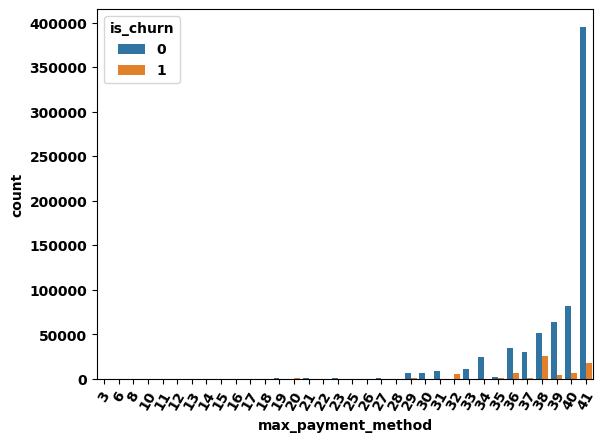

In [83]:
_= sns.countplot(x='max_payment_method', data=data, hue='is_churn')
_= plt.xticks(rotation=60)


In [106]:
trans_recalculated = pd.read_csv('../data/processed/transaction_recalculated_feature.csv')

In [108]:
data = pd.merge(data,trans_recalculated,on='msno',how='left')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800505 entries, 0 to 800504
Data columns (total 86 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   msno                               800505 non-null  object        
 1   is_churn                           800505 non-null  int64         
 2   city                               800505 non-null  float64       
 3   bd                                 800505 non-null  float64       
 4   registered_via                     800505 non-null  float64       
 5   registration_init_time             800505 non-null  datetime64[ns]
 6   registered_year                    800505 non-null  float64       
 7   change_in_payment_method           800505 non-null  int64         
 8   total_transaction                  800505 non-null  int64         
 9   max_payment_method                 800505 non-null  int64         
 10  avg_plan_days       

In [126]:
data.to_csv('../data/processed/finaldata_09082023.csv')

In [2]:
data = pd.read_csv('../data/processed/finaldata_09082023.csv',parse_dates=['registration_init_time'])

<Axes: xlabel='last_transaction_Exp_year', ylabel='count'>

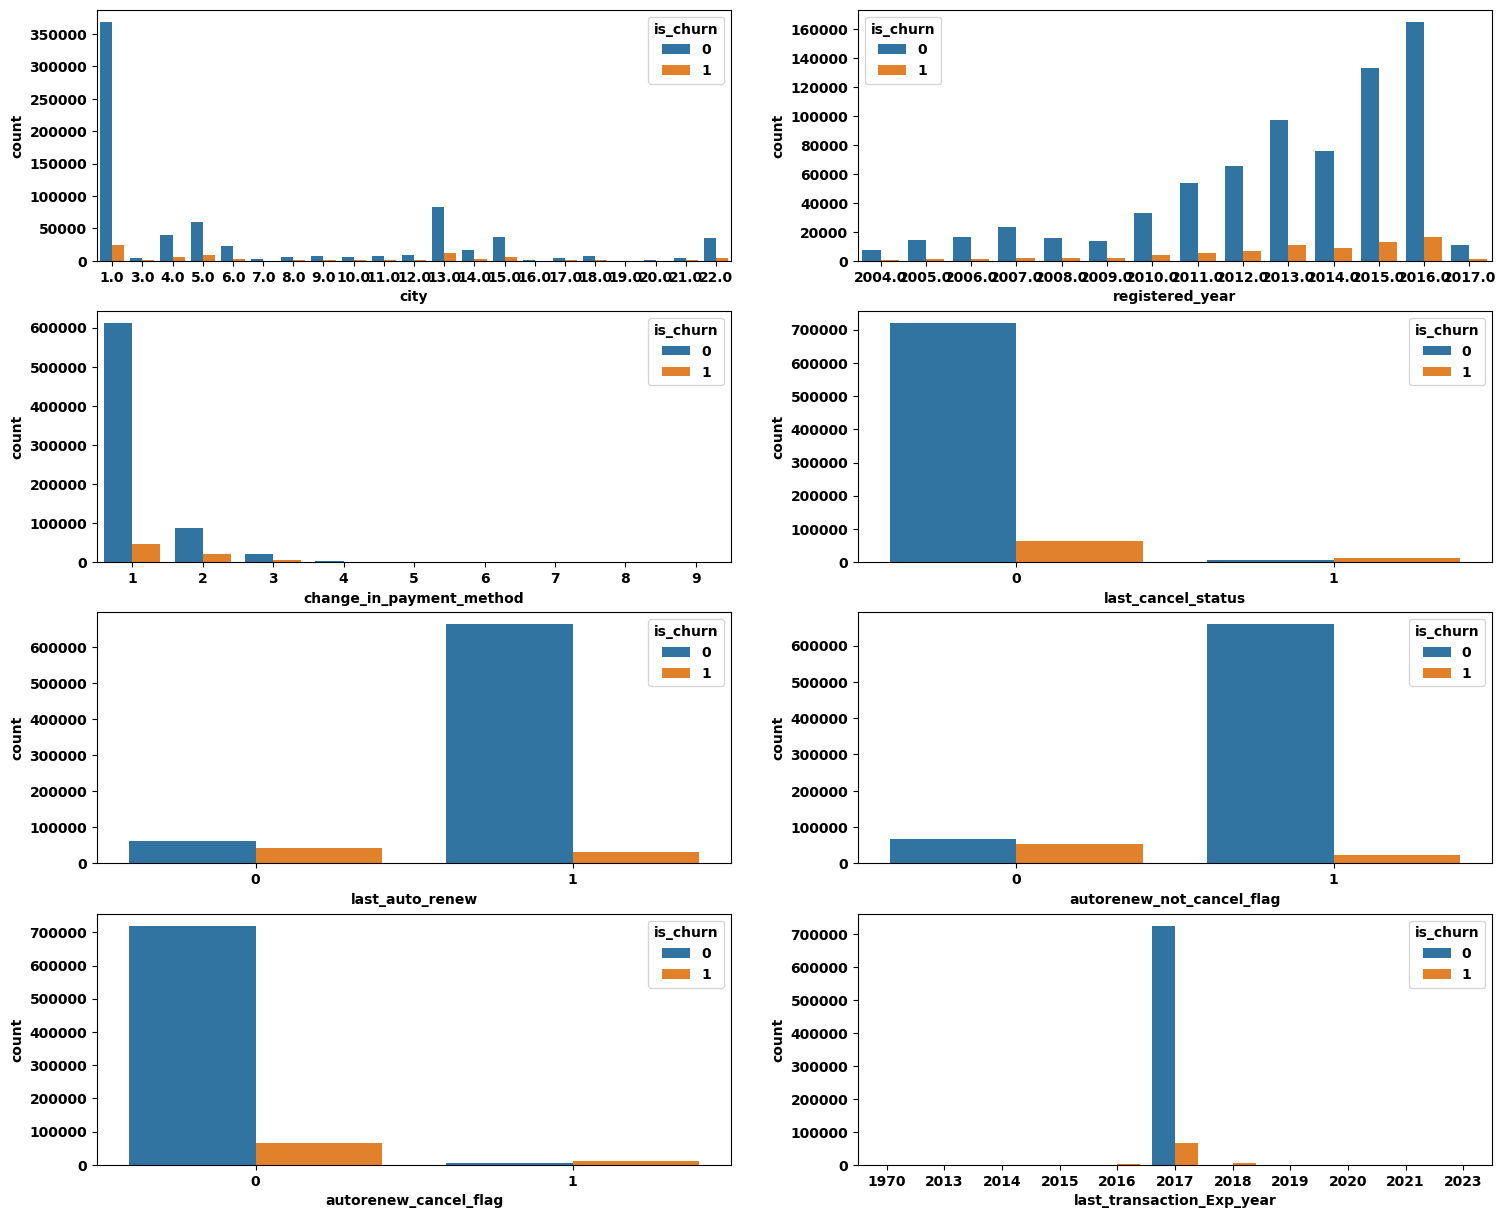

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(18,15))

#create countplot in each subplot
sns.countplot(x='city', data=data, hue='is_churn', ax=axes[0,0])
sns.countplot(x='registered_year', data=data, hue='is_churn', ax=axes[0,1])
sns.countplot(x='change_in_payment_method', data=data, hue='is_churn', ax=axes[1,0])
sns.countplot(x='last_cancel_status', data=data, hue='is_churn', ax=axes[1,1])
sns.countplot(x='last_auto_renew', data=data, hue='is_churn', ax=axes[2,0])
sns.countplot(x='autorenew_not_cancel_flag', data=data, hue='is_churn', ax=axes[2,1])
sns.countplot(x='autorenew_cancel_flag', data=data, hue='is_churn', ax=axes[3,0])
sns.countplot(x='last_transaction_Exp_year', data=data, hue='is_churn', ax=axes[3,1])

auto_renew,last_cancel has high correlation with is_churn, likewise autorenew_not_cancel_flag,autorenew_cancel_flag, 

In [ ]:
numerical - 
       'registration_init_time', 'registered_year', 'change_in_payment_method',
       'total_transaction', 'max_payment_method',       
        'change_in_list_price','change_in_amt_paid','change_in_plan_days','avg_days_diff_trans_exp', Days_Diff_trans_expire_date        
last_transaction_Exp_year

       'last_cancel_status', 'last_auto_renew', 'avg_days_diff_trans_exp',
       'autorenew_not_cancel_flag', 'autorenew_cancel_flag'

'sum_plan_days','avg_plan_days',  'avg_list_price','sum_list_price', 'sum_amt_paid', 'avg_discount', 'sum_discount','avg_amt_paid
category - 'is_churn','city', 'group_age',registered_via,registered_year','change_in_payment_method', 'last_cancel_status', 'last_auto_renew', ,
       'autorenew_not_cancel_flag', 'not_autorenew_cancel_flag'

<Axes: xlabel='is_churn', ylabel='avg_amt_paid'>

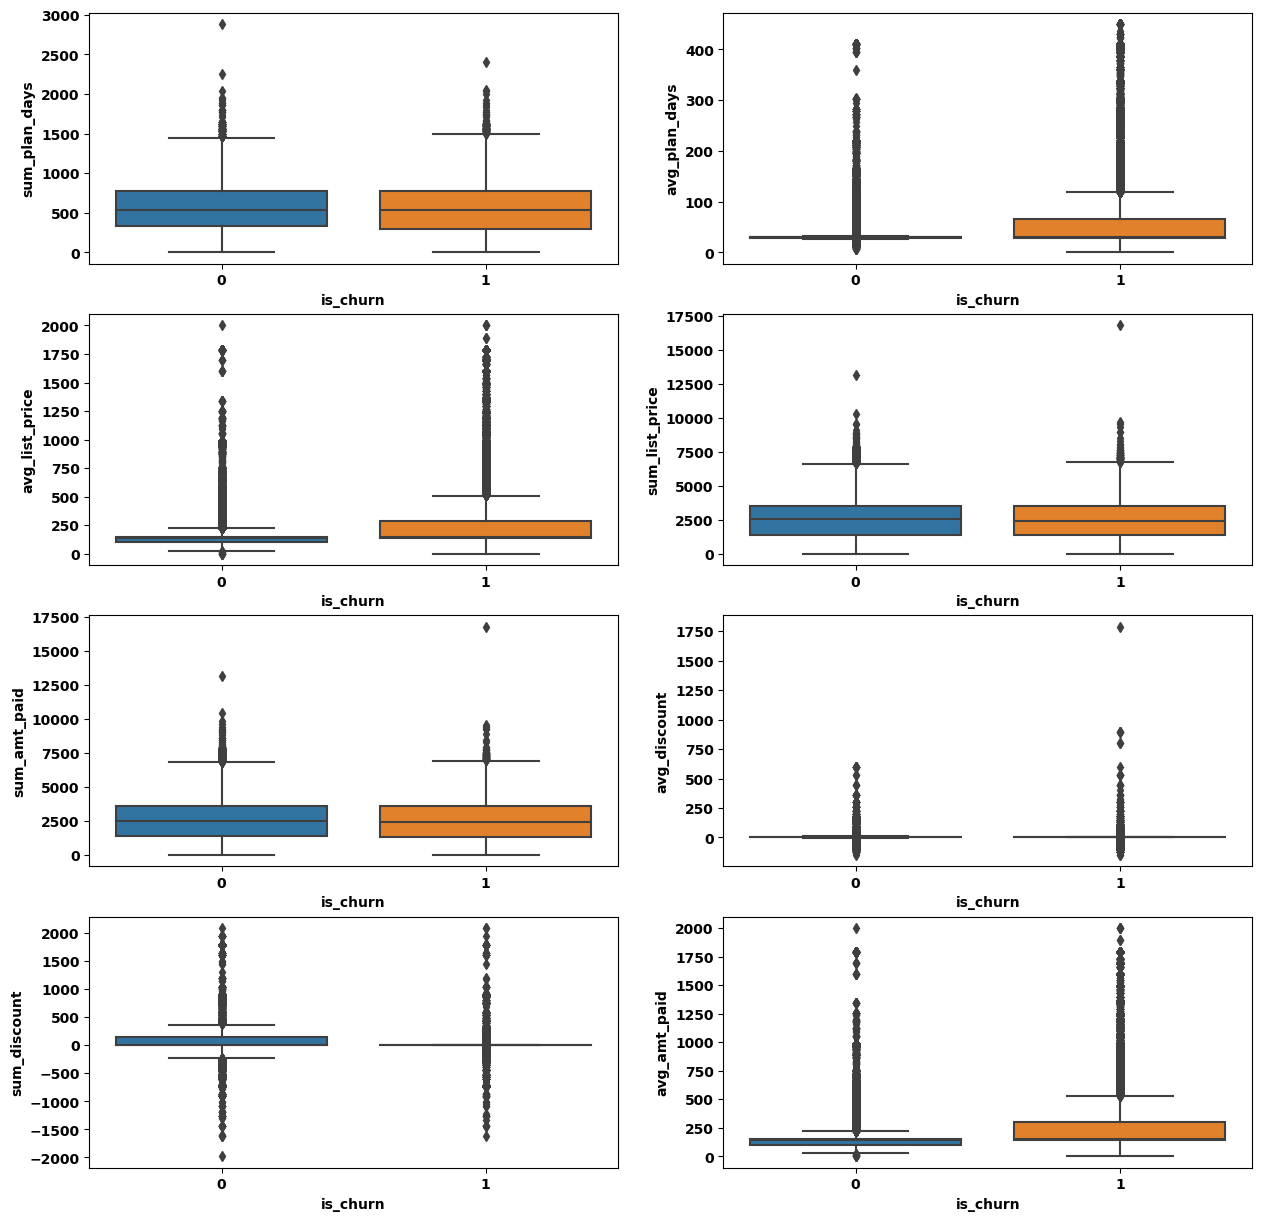

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(15,15))

#create boxplot in each subplot
sns.boxplot(data=data, x='is_churn', y='sum_plan_days', ax=axes[0,0])
sns.boxplot(data=data, x='is_churn', y='avg_plan_days', ax=axes[0,1])
sns.boxplot(data=data, x='is_churn', y='avg_list_price', ax=axes[1,0])
sns.boxplot(data=data, x='is_churn', y='sum_list_price', ax=axes[1,1])
sns.boxplot(data=data, x='is_churn', y='sum_amt_paid', ax=axes[2,0])
sns.boxplot(data=data, x='is_churn', y='avg_discount', ax=axes[2,1])
sns.boxplot(data=data, x='is_churn', y='sum_discount', ax=axes[3,0])
sns.boxplot(data=data, x='is_churn', y='avg_amt_paid', ax=axes[3,1])

drop sum_discount,avg_discount, data is not consistent to find discount. most of the time list price is 0 and amt paid has a value.

In [3]:
del data['avg_discount']
del data['sum_discount']

In [36]:
report = ProfileReport(data, title='Original Data')
report.to_file("profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data.to_csv('../data/processed/finaldata_09112023.csv')

In [5]:
data_split = data.drop(['registration_init_time','age_group'],axis=1)



<Axes: >

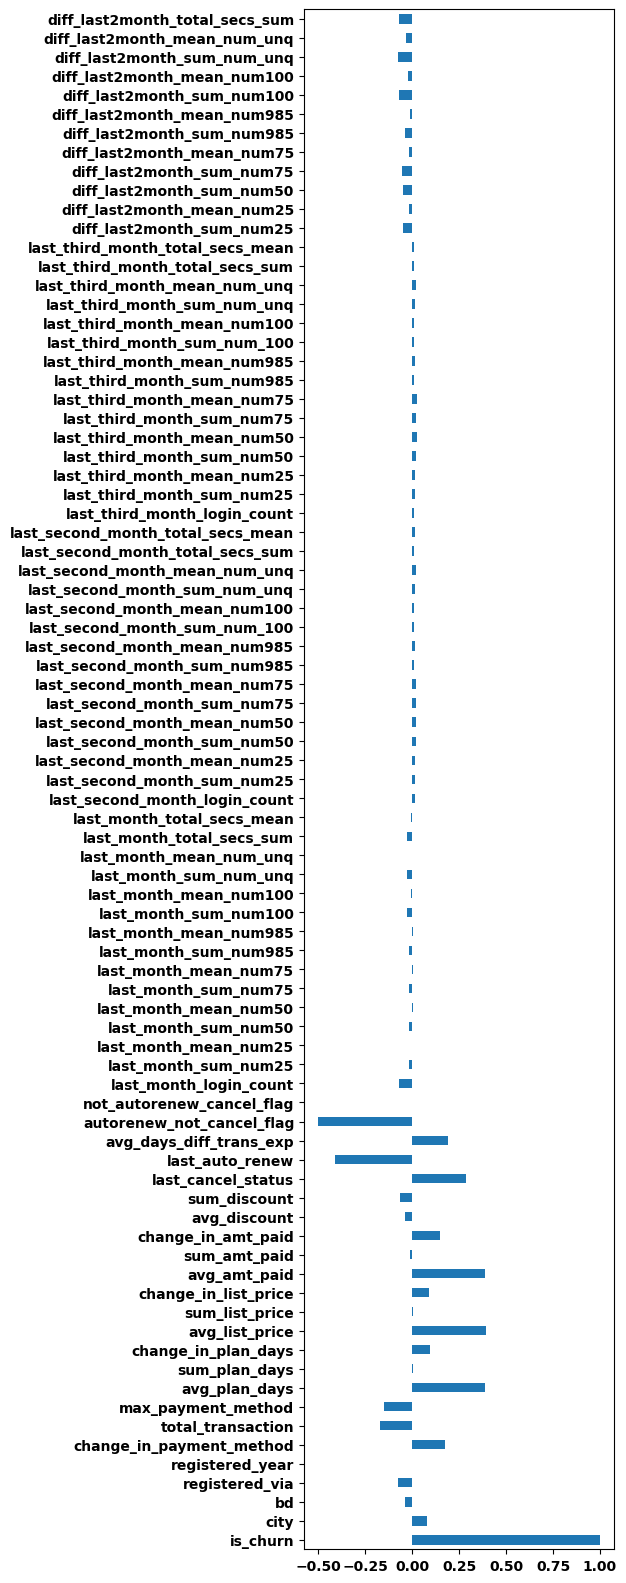

In [105]:
(data.corr(numeric_only=True).loc['is_churn'].plot(kind='barh',figsize=(4,20)))


In [38]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'msno', 'is_churn', 'city', 'bd',
       'registered_via', 'registration_init_time', 'registered_year',
       'change_in_payment_method', 'total_transaction', 'max_payment_method',
       'avg_plan_days', 'sum_plan_days', 'change_in_plan_days',
       'avg_list_price', 'sum_list_price', 'change_in_list_price',
       'avg_amt_paid', 'sum_amt_paid', 'change_in_amt_paid',
       'last_cancel_status', 'last_auto_renew', 'autorenew_not_cancel_flag',
       'last_month_login_count', 'last_month_sum_num25',
       'last_month_sum_num50', 'last_month_sum_num75', 'last_month_sum_num985',
       'last_month_sum_num100', 'last_month_sum_num_unq',
       'last_month_total_secs_sum', 'last_second_month_login_count',
       'last_second_month_sum_num25', 'last_second_month_sum_num50',
       'last_second_month_sum_num75', 'last_second_month_sum_num985',
       'last_second_month_sum_num_100', 'last_second_month_sum_num_unq',
       'last_second_month_total_secs

In [35]:
data.drop(columns=['Days_Diff_trans_expire_date','last_transaction_Exp_year','avg_days_diff_trans_exp'],inplace=True,axis=1)

In [32]:
trans_recalculated = pd.read_csv('../data/processed/transaction_recalculated_feature.csv')

In [37]:
data = pd.merge(data,trans_recalculated,on='msno',how='left')

In [11]:
Df_Lastmonth = data[['is_churn',
       'last_month_login_count', 'last_month_sum_num25',
       'last_month_mean_num25', 'last_month_sum_num50',
       'last_month_mean_num50', 'last_month_sum_num75',
       'last_month_mean_num75', 'last_month_sum_num985',
       'last_month_mean_num985', 'last_month_sum_num100',
       'last_month_mean_num100', 'last_month_sum_num_unq',
       'last_month_mean_num_unq', 'last_month_total_secs_sum',
       'last_month_total_secs_mean']]

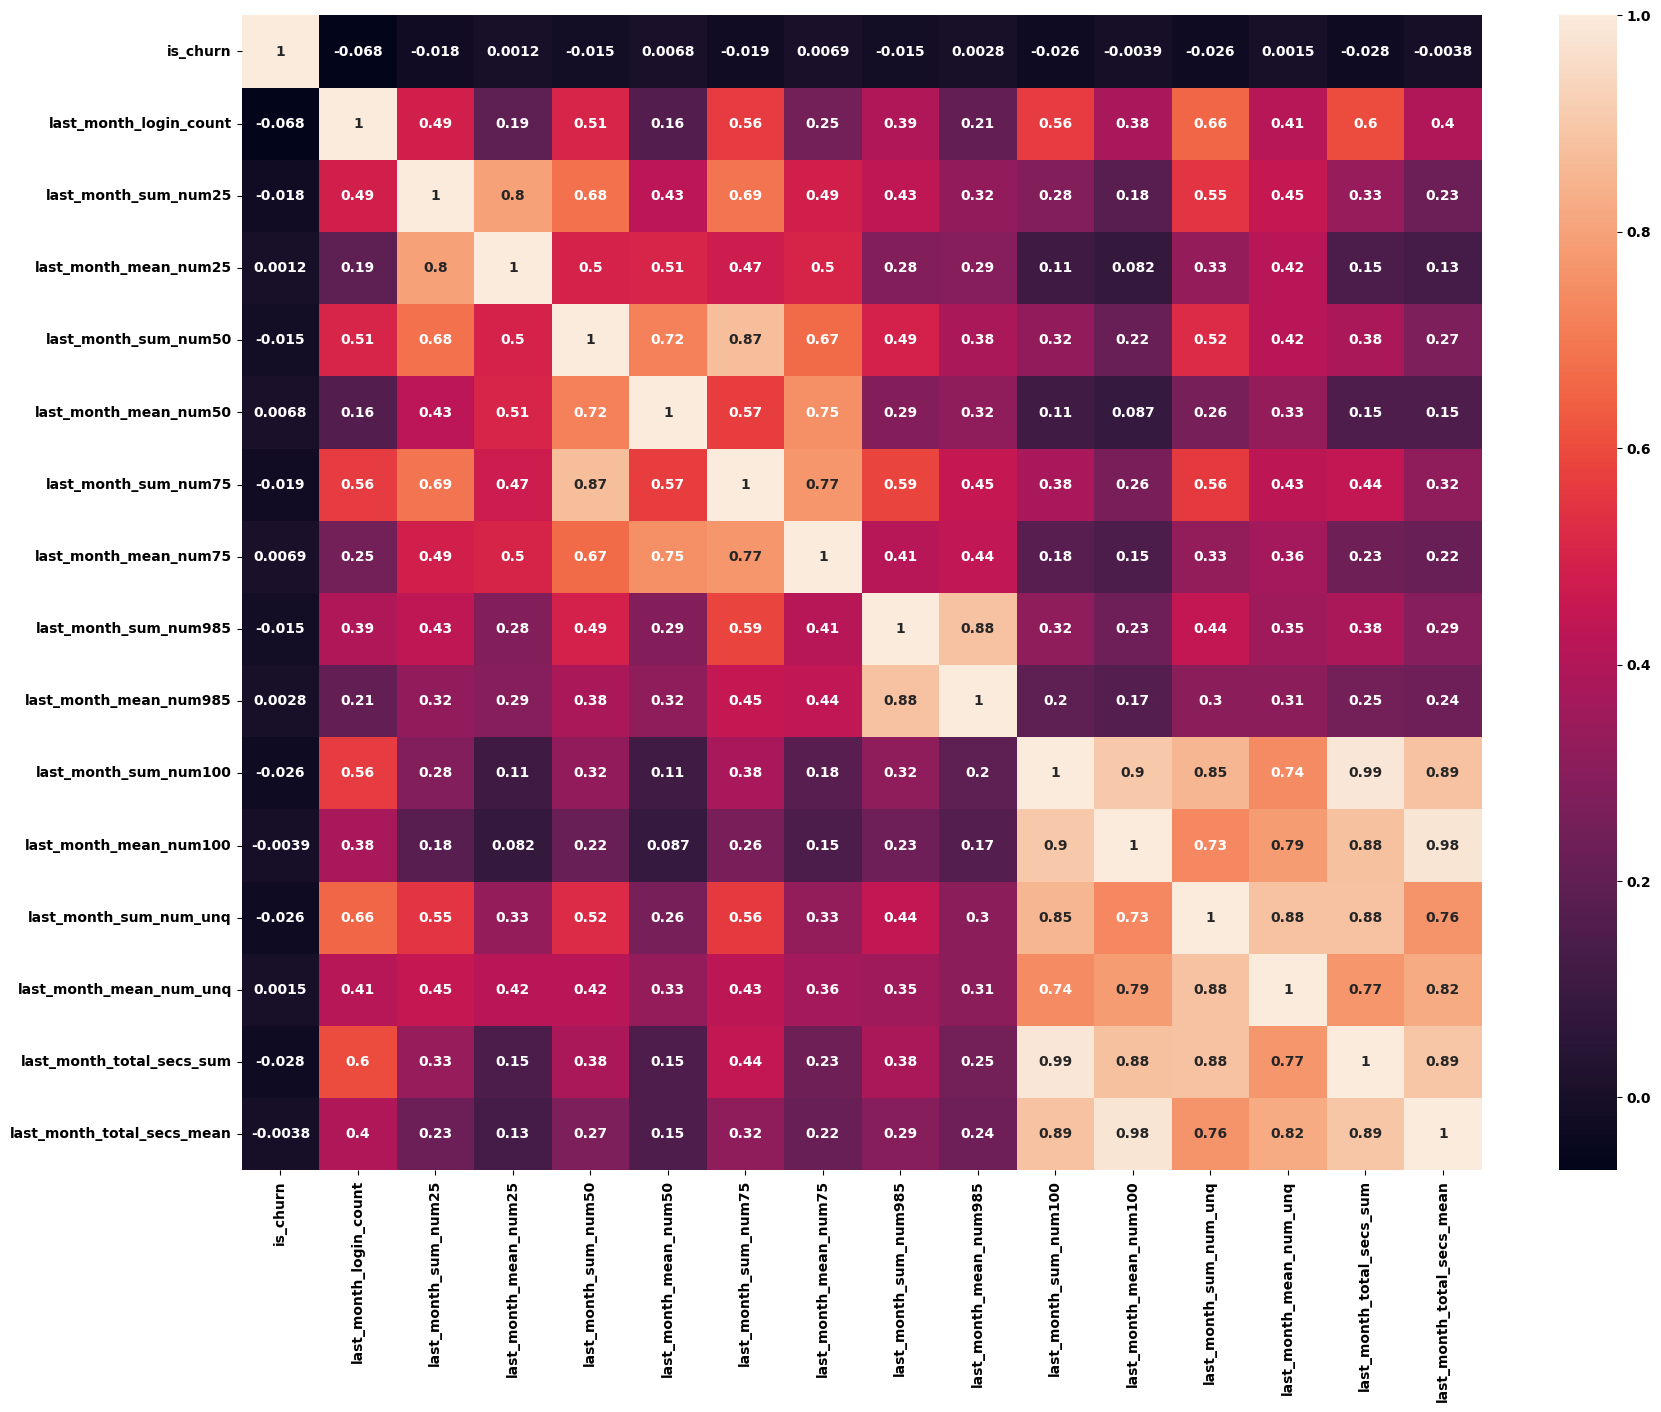

In [12]:
corr=Df_Lastmonth.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

# displaying the plotted heatmap
plt.show()

column with sum and mean has high correlation, lets remove mean columns and have sum columns alone

In [13]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'msno', 'is_churn', 'city', 'bd',
       'registered_via', 'registration_init_time', 'registered_year',
       'change_in_payment_method', 'total_transaction', 'max_payment_method',
       'avg_plan_days', 'sum_plan_days', 'change_in_plan_days',
       'avg_list_price', 'sum_list_price', 'change_in_list_price',
       'avg_amt_paid', 'sum_amt_paid', 'change_in_amt_paid',
       'last_cancel_status', 'last_auto_renew', 'avg_days_diff_trans_exp',
       'autorenew_not_cancel_flag', 'not_autorenew_cancel_flag',
       'last_month_login_count', 'last_month_sum_num25',
       'last_month_mean_num25', 'last_month_sum_num50',
       'last_month_mean_num50', 'last_month_sum_num75',
       'last_month_mean_num75', 'last_month_sum_num985',
       'last_month_mean_num985', 'last_month_sum_num100',
       'last_month_mean_num100', 'last_month_sum_num_unq',
       'last_month_mean_num_unq', 'last_month_total_secs_sum',
       'last_month_total_secs_mean', 'last_

In [14]:
data = data.drop(['last_month_mean_num25', 'last_month_mean_num50','last_month_mean_num75','last_month_mean_num985','last_month_mean_num100','last_month_mean_num_unq','last_month_total_secs_mean'],axis = 1)

In [15]:
data = data.drop(['last_second_month_mean_num25', 'last_second_month_mean_num50','last_second_month_mean_num75','last_second_month_mean_num985','last_second_month_mean_num100','last_second_month_mean_num_unq','last_second_month_total_secs_mean'],axis = 1)

In [16]:
data = data.drop(['last_third_month_mean_num25', 'last_third_month_mean_num50','last_third_month_mean_num75','last_third_month_mean_num985','last_third_month_mean_num100','last_third_month_mean_num_unq','last_third_month_total_secs_mean'],axis = 1)

In [18]:
data = data.drop(['diff_last2month_mean_num25','diff_last2month_mean_num75','diff_last2month_mean_num985','diff_last2month_mean_num100','diff_last2month_mean_num_unq'],axis = 1)

In [24]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'msno', 'is_churn', 'city', 'bd',
       'registered_via', 'registration_init_time', 'registered_year',
       'change_in_payment_method', 'total_transaction', 'max_payment_method',
       'avg_plan_days', 'sum_plan_days', 'change_in_plan_days',
       'avg_list_price', 'sum_list_price', 'change_in_list_price',
       'avg_amt_paid', 'sum_amt_paid', 'change_in_amt_paid',
       'last_cancel_status', 'last_auto_renew', 'avg_days_diff_trans_exp',
       'autorenew_not_cancel_flag', 'last_month_login_count',
       'last_month_sum_num25', 'last_month_sum_num50', 'last_month_sum_num75',
       'last_month_sum_num985', 'last_month_sum_num100',
       'last_month_sum_num_unq', 'last_month_total_secs_sum',
       'last_second_month_login_count', 'last_second_month_sum_num25',
       'last_second_month_sum_num50', 'last_second_month_sum_num75',
       'last_second_month_sum_num985', 'last_second_month_sum_num_100',
       'last_second_month_sum_num_unq', 'l

In [40]:
Df_transaction = data[['is_churn', 'city', 'bd',
       'registered_via', 'registration_init_time', 'registered_year',
       'change_in_payment_method', 'total_transaction', 'max_payment_method',
       'avg_plan_days', 'sum_plan_days', 'change_in_plan_days',
       'avg_list_price', 'sum_list_price', 'change_in_list_price',
       'avg_amt_paid', 'sum_amt_paid', 'change_in_amt_paid',
       'last_cancel_status', 'last_auto_renew',
       'autorenew_not_cancel_flag', 'autorenew_cancel_flag','Days_Diff_trans_expire_date', 'last_transaction_Exp_year']]

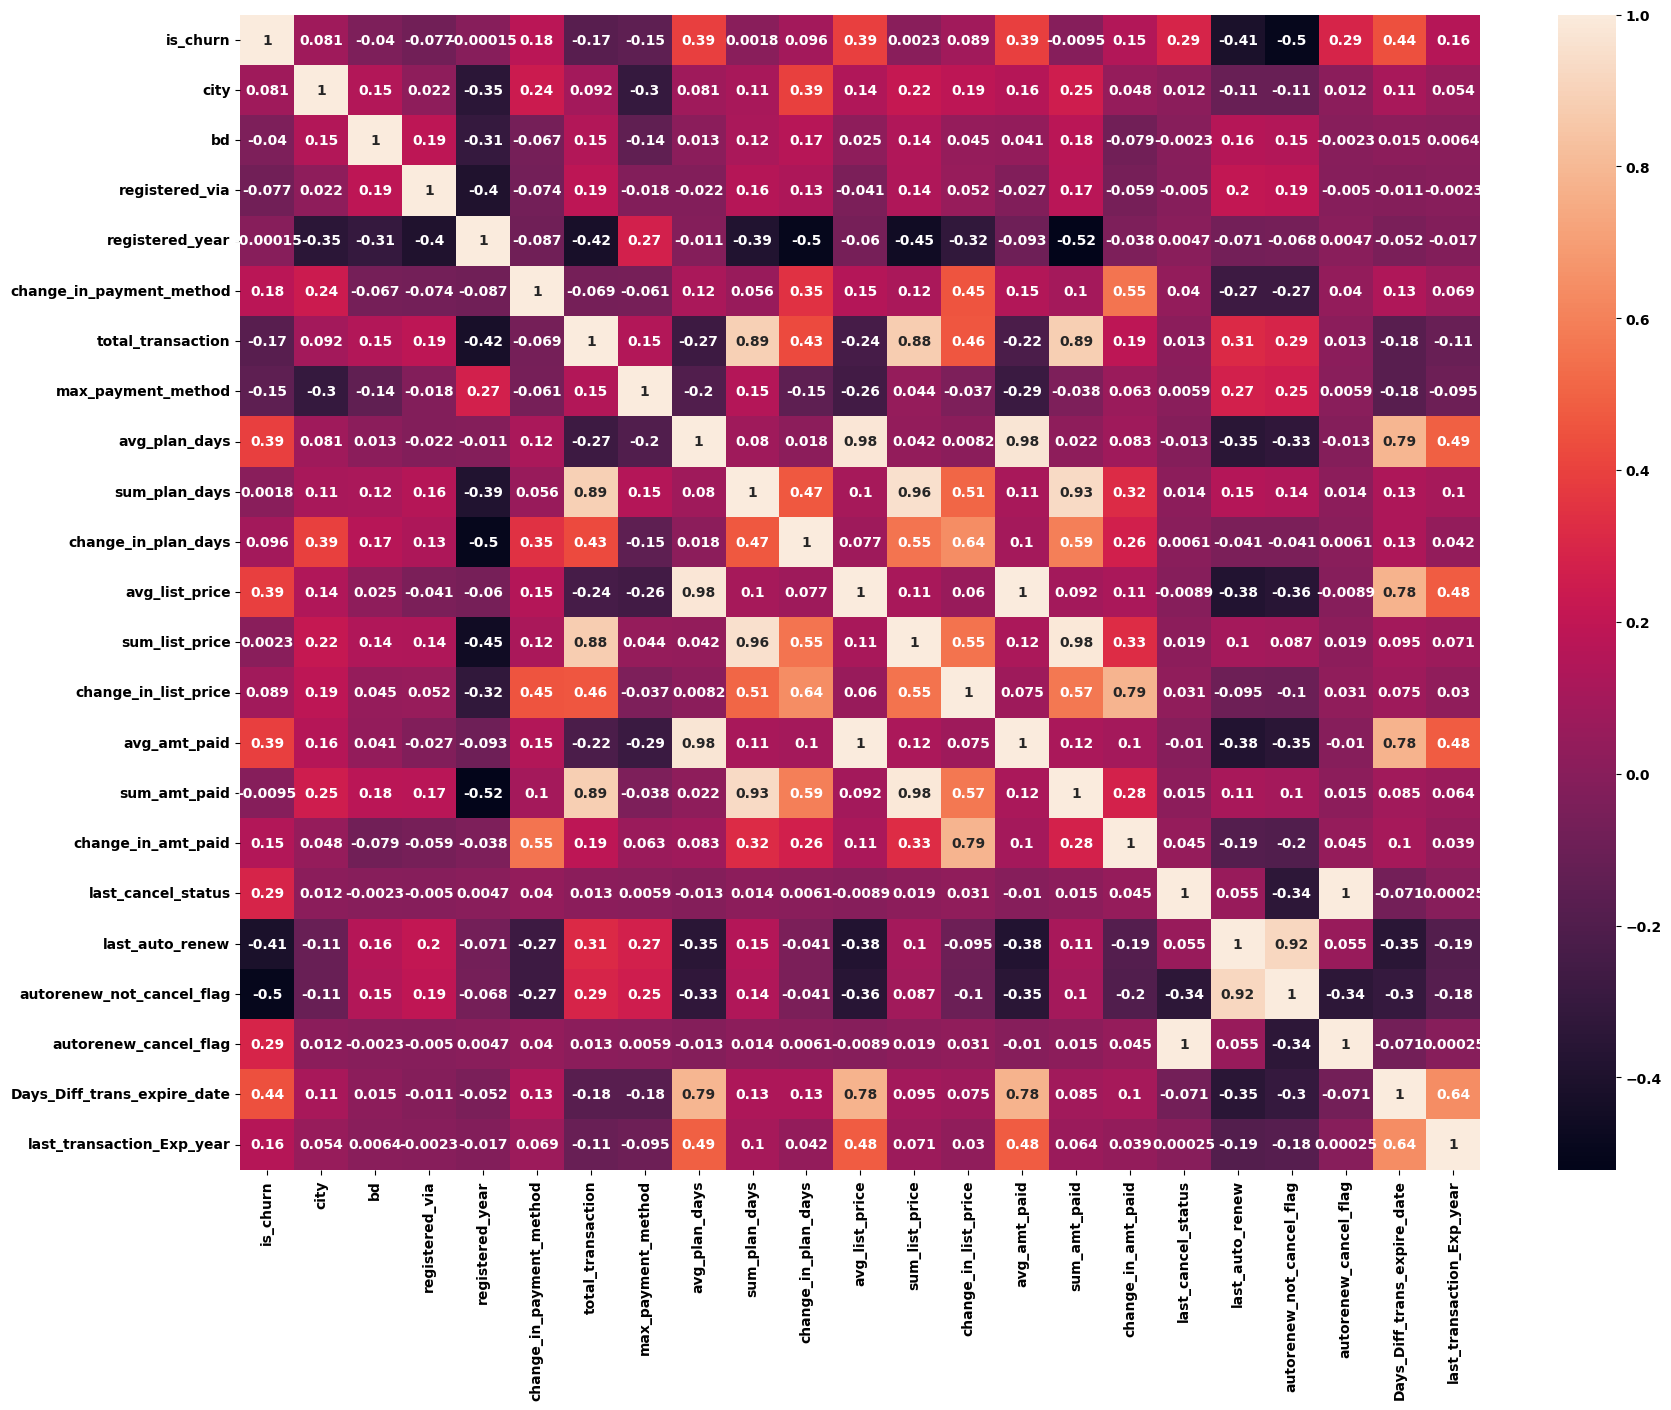

In [41]:
corr=Df_transaction.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

# displaying the plotted heatmap
plt.show()

#Multicollinearity - high corellation
--------------------------------------
sum_list_price - Total_transaction,sum_amt_paid
sum_plan_days - Total_transaction
sum_amt_paid - Total_transaction
avg_list_price - avg_plan_days
sum_amt_paid - sum_plan_days
avg_list_price - avg_amt_paid
avg_amt_paid - avg_list_price -1 , avg_plan_days
change_in_amt_paid - change_in_list_price
sum_amt_paid - change_in_plan_days,
last_cancel_status, last_auto_renew -
Days_Diff_trans_expire_date -last_transaction_Exp_year'

sum_amt_paid can be used than sum_list_price, like vice sum_plan_days is highly correlated with sum_amt_paid, it can be dropped too.  Total_transaction can be dropped, autorenew_not_cancel_flag, autorenew_cancel_flag, last_transaction_Exp_year

In [ ]:
drop - Total_transaction,sum_plan_days, sum_list_price, avg_list_price, avg_plan_days, change_in_list_price, change_in_plan_days,change_in_list_price,
last_cancel_status, last_auto_renew, last_transaction_Exp_year, change_in_payment_method

drop - registered_year propositional churn behavior is equal with year, bd and age_group for same reason

In [44]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'msno', 'is_churn', 'city', 'bd',
       'registered_via', 'registration_init_time', 'registered_year',
       'change_in_payment_method', 'total_transaction', 'max_payment_method',
       'avg_plan_days', 'sum_plan_days', 'change_in_plan_days',
       'avg_list_price', 'sum_list_price', 'change_in_list_price',
       'avg_amt_paid', 'sum_amt_paid', 'change_in_amt_paid',
       'last_cancel_status', 'last_auto_renew', 'autorenew_not_cancel_flag',
       'last_month_login_count', 'last_month_sum_num25',
       'last_month_sum_num50', 'last_month_sum_num75', 'last_month_sum_num985',
       'last_month_sum_num100', 'last_month_sum_num_unq',
       'last_month_total_secs_sum', 'last_second_month_login_count',
       'last_second_month_sum_num25', 'last_second_month_sum_num50',
       'last_second_month_sum_num75', 'last_second_month_sum_num985',
       'last_second_month_sum_num_100', 'last_second_month_sum_num_unq',
       'last_second_month_total_secs

In [45]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0','city', 'bd','registration_init_time','registered_year','total_transaction','sum_plan_days', 'sum_list_price', 'avg_list_price', 'avg_plan_days', 'change_in_list_price', 'change_in_plan_days','change_in_list_price',
'last_cancel_status', 'last_auto_renew', 'last_transaction_Exp_year', 'change_in_payment_method'],axis = 1)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800505 entries, 0 to 800504
Data columns (total 30 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   msno                              800505 non-null  object 
 1   is_churn                          800505 non-null  int64  
 2   registered_via                    800505 non-null  float64
 3   max_payment_method                800505 non-null  int64  
 4   avg_amt_paid                      800505 non-null  float64
 5   sum_amt_paid                      800505 non-null  int64  
 6   change_in_amt_paid                800505 non-null  int64  
 7   autorenew_not_cancel_flag         800505 non-null  int8   
 8   last_month_login_count            800505 non-null  float64
 9   last_month_sum_num25              800505 non-null  float64
 10  last_month_sum_num75              800505 non-null  float64
 11  last_month_sum_num985             800505 non-null  f

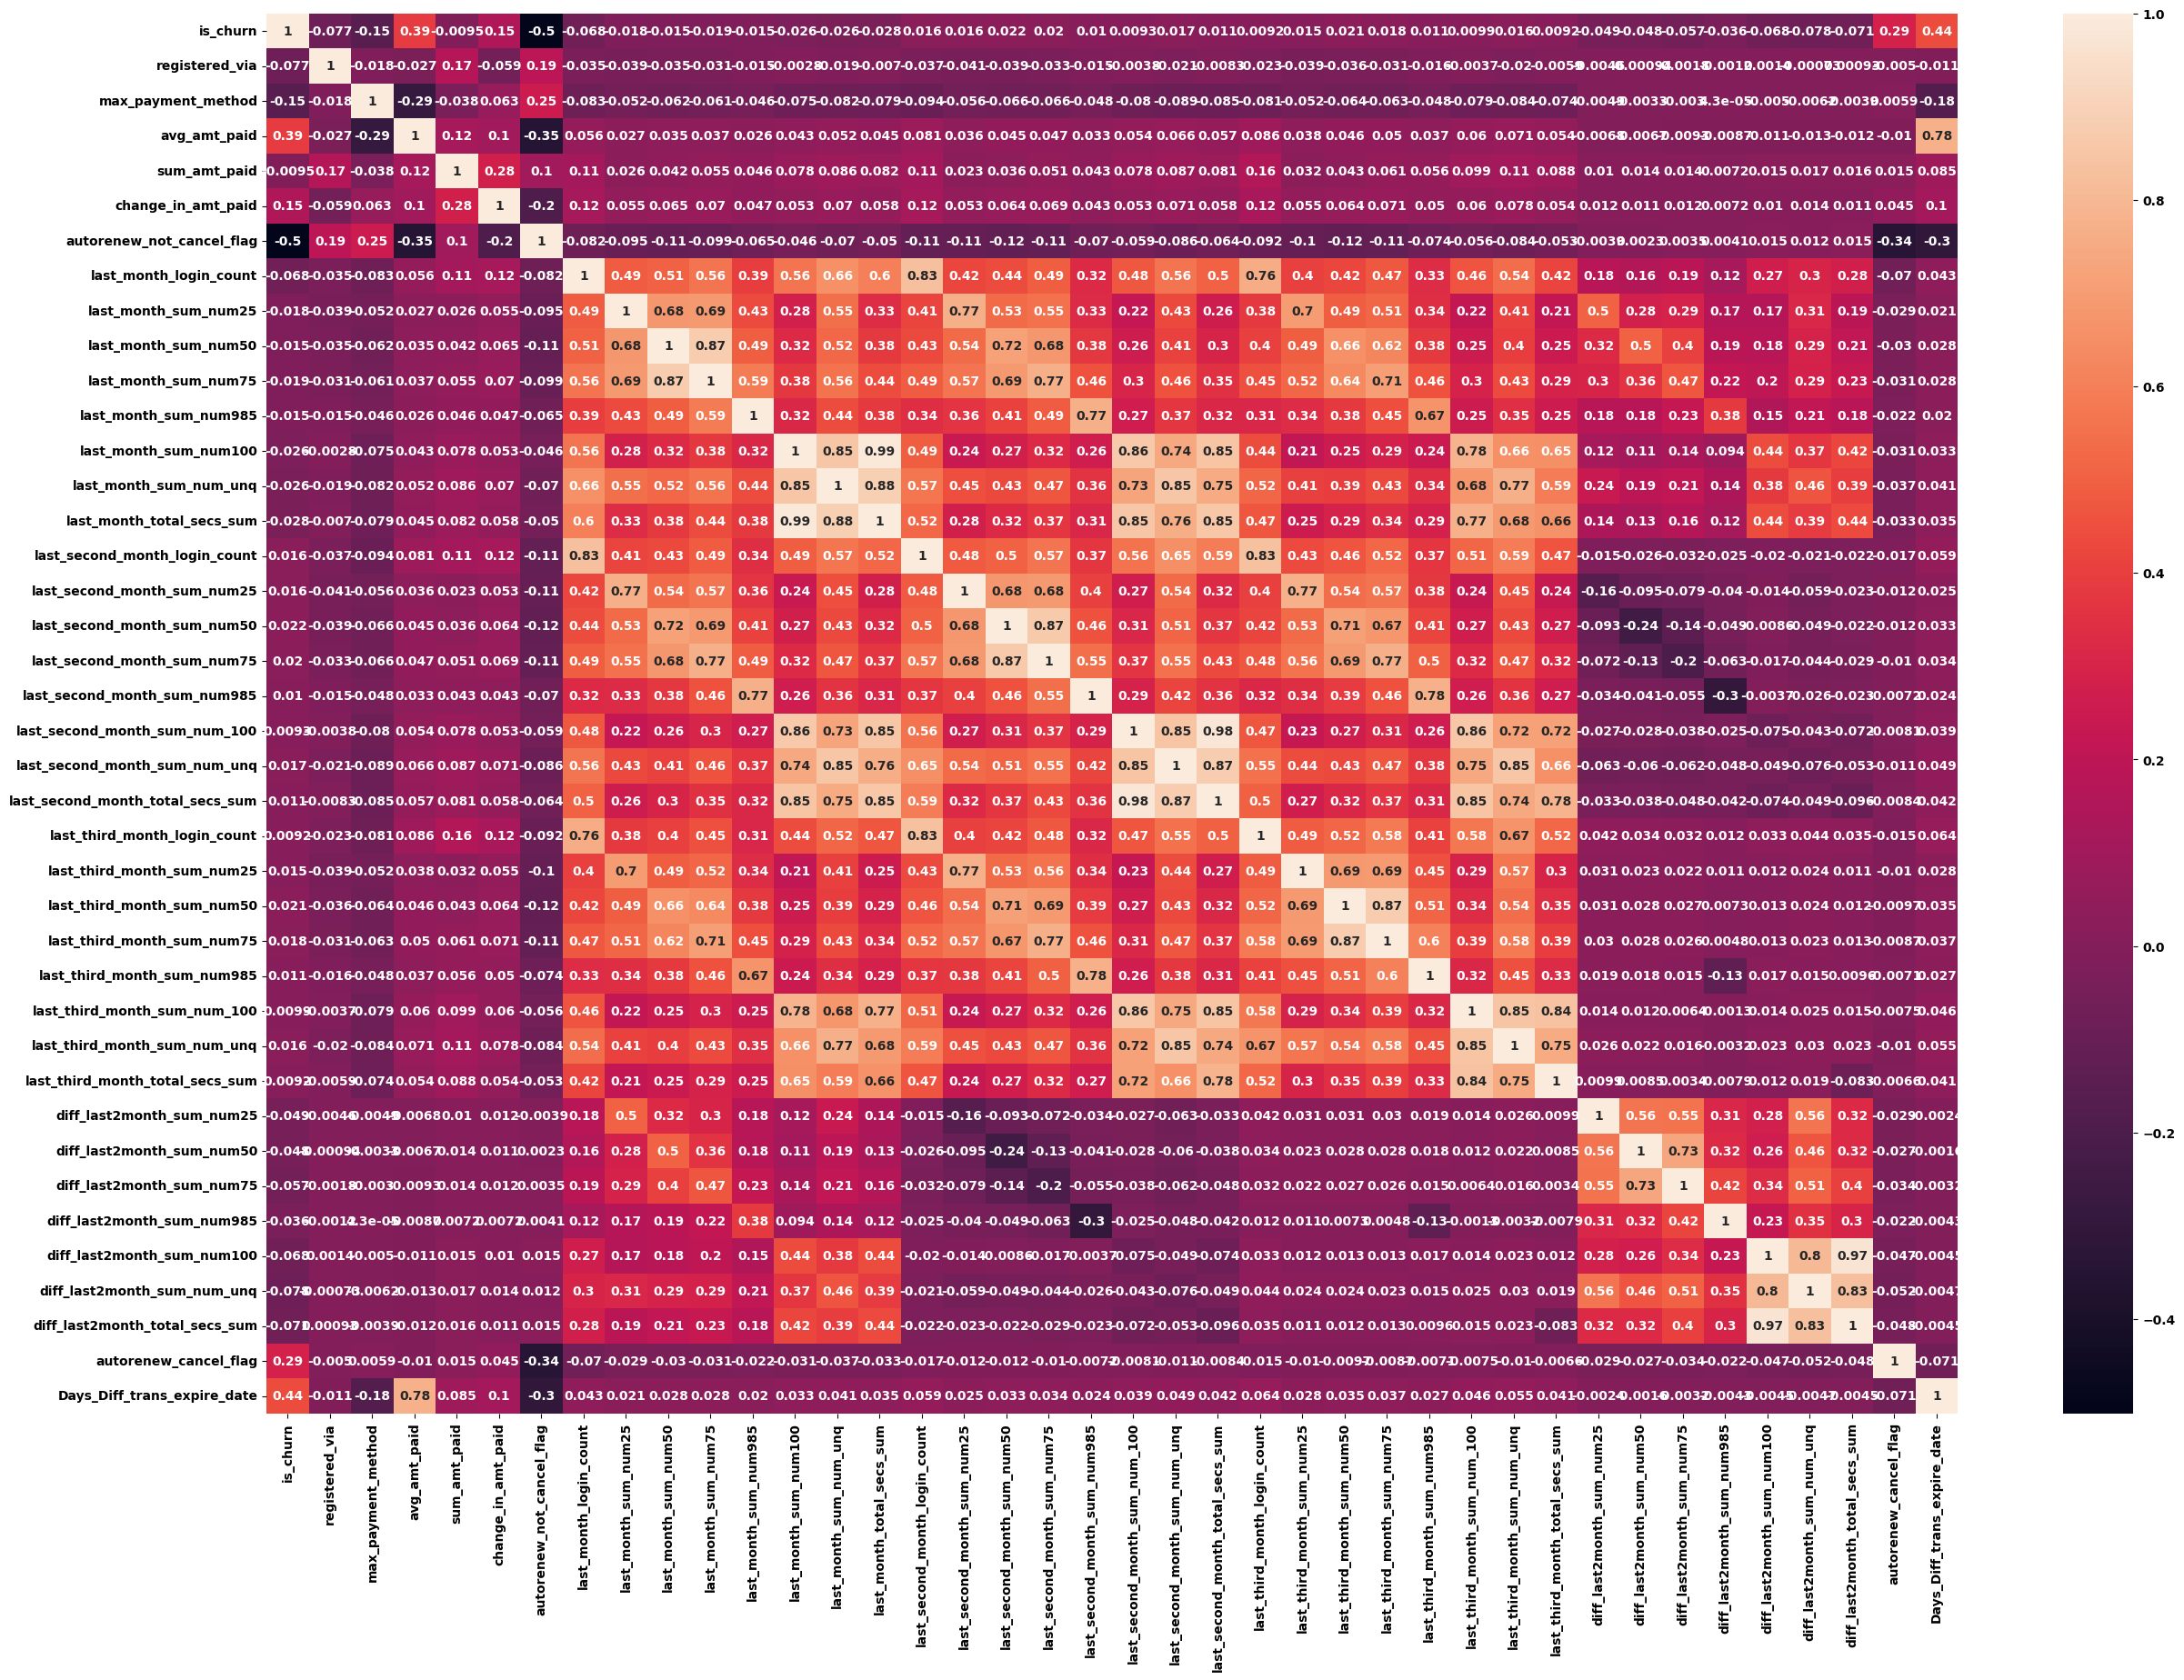

In [51]:
corr=data.corr()
plt.subplots(figsize=(30,20))
sns.heatmap(corr,annot=True)

# displaying the plotted heatmap
plt.show()

high correlation between sum_num100 & summ_num_unq,total_secs_sum
sum_num50 & sum_num75

drop - sum_num100

In [53]:
data = data.drop(['last_month_sum_num100', 'last_month_sum_num_unq','last_month_sum_num50','diff_last2month_sum_num100', 'diff_last2month_sum_num_unq','diff_last2month_sum_num50','last_second_month_sum_num_100', 'last_second_month_sum_num_unq','last_second_month_sum_num50','last_third_month_sum_num_100', 'last_third_month_sum_num_unq','last_third_month_sum_num50'],axis = 1)


In [55]:
data.to_csv('../data/processed/reducedfeature_09122023.csv',index=False)